<h1  style='font-size:30px;text-align:center'>Energy Imbalance Reduction Challenge: Predictive Modeling for Prosumer Energy Behavior</h1>

## Importing Requirements

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
client_df=pd.read_csv(r'/kaggle/input/energy/client.csv')
electricity_prices_df=pd.read_csv(r'/kaggle/input/energy/electricity_prices.csv')
forecast_weather=pd.read_csv(r'/kaggle/input/energy/forecast_weather.csv')
gas_prices=pd.read_csv(r'/kaggle/input/energy/gas_prices.csv')
historical_weather=pd.read_csv(r'/kaggle/input/energy/historical_weather.csv')
train=pd.read_csv(r'/kaggle/input/energy/train.csv')
weather_station_to_country_mapping=pd.read_csv(r'/kaggle/input/energy/weather_station_to_county_mapping.csv')

In [3]:
pip install --upgrade pandas




















Note: you may need to restart the kernel to use updated packages.


# INDIVIDUAL DATASET EXPLORATION

## Client df

product_type
county - An ID code for the county. See county_id_to_name_map.json for the mapping of ID codes to county names.
eic_count - The aggregated number of consumption points (EICs - European Identifier Code).
installed_capacity - Installed photovoltaic solar panel capacity in kilowatts.
is_business - Boolean for whether or not the prosumer is a business.
date
data_block_id

In [4]:
client_df.head()

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2


In [5]:
client_df.columns

Index(['product_type', 'county', 'eic_count', 'installed_capacity',
       'is_business', 'date', 'data_block_id'],
      dtype='object')

In [6]:
client_df.shape

(41919, 7)

In [7]:
client_df.nunique()

product_type             4
county                  16
eic_count              484
installed_capacity    1952
is_business              2
date                   636
data_block_id          636
dtype: int64

In [8]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>



RangeIndex: 41919 entries, 0 to 41918



Data columns (total 7 columns):



 #   Column              Non-Null Count  Dtype  



---  ------              --------------  -----  



 0   product_type        41919 non-null  int64  



 1   county              41919 non-null  int64  



 2   eic_count           41919 non-null  int64  



 3   installed_capacity  41919 non-null  float64



 4   is_business         41919 non-null  int64  



 5   date                41919 non-null  object 



 6   data_block_id       41919 non-null  int64  



dtypes: float64(1), int64(5), object(1)



memory usage: 2.2+ MB


In [9]:
client_df.describe()

,product_type,county,eic_count,installed_capacity,is_business,data_block_id
count,41919.000000,41919.000000,41919.000000,41919.000000,41919.000000,41919.000000
mean,1.898996,7.297097,73.345118,1450.771451,0.536773,322.898876
std,1.081713,4.780750,144.064389,2422.233120,0.498652,182.075724
min,0.000000,0.000000,5.000000,5.500000,0.000000,2.000000
25%,1.000000,3.000000,13.000000,321.900000,0.000000,167.000000
50%,2.000000,7.000000,32.000000,645.200000,1.000000,324.000000
75%,3.000000,11.000000,70.000000,1567.150000,1.000000,480.000000
max,3.000000,15.000000,1517.000000,19314.310000,1.000000,637.000000


In [10]:
 client_df.dtypes

product_type            int64
county                  int64
eic_count               int64
installed_capacity    float64
is_business             int64
date                   object
data_block_id           int64
dtype: object

## Electricity Prices df

In [11]:
electricity_prices_df.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


In [12]:
electricity_prices_df.columns

Index(['forecast_date', 'euros_per_mwh', 'origin_date', 'data_block_id'], dtype='object')

In [13]:
electricity_prices_df.shape

(15286, 4)

In [14]:
electricity_prices_df.nunique()

forecast_date    15286
euros_per_mwh    11025
origin_date      15286
data_block_id      637
dtype: int64

In [15]:
electricity_prices_df.info()

<class 'pandas.core.frame.DataFrame'>



RangeIndex: 15286 entries, 0 to 15285



Data columns (total 4 columns):



 #   Column         Non-Null Count  Dtype  



---  ------         --------------  -----  



 0   forecast_date  15286 non-null  object 



 1   euros_per_mwh  15286 non-null  float64



 2   origin_date    15286 non-null  object 



 3   data_block_id  15286 non-null  int64  



dtypes: float64(1), int64(1), object(2)



memory usage: 477.8+ KB


In [16]:
electricity_prices_df.describe()

,euros_per_mwh,data_block_id
count,15286.000000,15286.000000
mean,157.064176,318.990710
std,121.148625,183.890301
min,-10.060000,1.000000
25%,85.290000,160.000000
50%,128.280000,319.000000
75%,199.797500,478.000000
max,4000.000000,637.000000


In [17]:
electricity_prices_df.dtypes

forecast_date     object
euros_per_mwh    float64
origin_date       object
data_block_id      int64
dtype: object

## Forecast Weather df

In [18]:
forecast_weather.head()

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,57.6,21.7,2021-09-01 00:00:00+00:00,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0
1,57.6,22.2,2021-09-01 00:00:00+00:00,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0
2,57.6,22.7,2021-09-01 00:00:00+00:00,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0
3,57.6,23.2,2021-09-01 00:00:00+00:00,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0
4,57.6,23.7,2021-09-01 00:00:00+00:00,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0


In [19]:
forecast_weather.columns

Index(['latitude', 'longitude', 'origin_datetime', 'hours_ahead',
       'temperature', 'dewpoint', 'cloudcover_high', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_total', '10_metre_u_wind_component',
       '10_metre_v_wind_component', 'data_block_id', 'forecast_datetime',
       'direct_solar_radiation', 'surface_solar_radiation_downwards',
       'snowfall', 'total_precipitation'],
      dtype='object')

In [20]:
forecast_weather.shape

(3424512, 18)

In [21]:
forecast_weather.nunique()

latitude                                   8
longitude                                 14
origin_datetime                          637
hours_ahead                               48
temperature                           400895
dewpoint                              439461
cloudcover_high                       212178
cloudcover_low                        408609
cloudcover_mid                        308004
cloudcover_total                      698385
10_metre_u_wind_component            3166997
10_metre_v_wind_component            3142161
data_block_id                            637
forecast_datetime                      15312
direct_solar_radiation               1199360
surface_solar_radiation_downwards    1496773
snowfall                              256201
total_precipitation                   540661
dtype: int64

In [22]:
forecast_weather.info()

<class 'pandas.core.frame.DataFrame'>



RangeIndex: 3424512 entries, 0 to 3424511



Data columns (total 18 columns):



 #   Column                             Dtype  



---  ------                             -----  



 0   latitude                           float64



 1   longitude                          float64



 2   origin_datetime                    object 



 3   hours_ahead                        int64  



 4   temperature                        float64



 5   dewpoint                           float64



 6   cloudcover_high                    float64



 7   cloudcover_low                     float64



 8   cloudcover_mid                     float64



 9   cloudcover_total                   float64



 10  10_metre_u_wind_component          float64



 11  10_metre_v_wind_component          float64



 12  data_block_id                      int64  



 13  forecast_datetime                  object 



 14  direct_solar_radiation             float64



 15  surfac

In [23]:
forecast_weather.describe()

,latitude,longitude,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
count,3.424512e+06,3.424512e+06,3.424512e+06,3.424512e+06,3.424512e+06,3.424512e+06,3.424512e+06,3.424512e+06,3.424512e+06,3.424512e+06,3.424512e+06,3.424512e+06,3.424512e+06,3.424510e+06,3.424512e+06,3.424512e+06
mean,5.865000e+01,2.495000e+01,2.450000e+01,5.743913e+00,2.411946e+00,3.946654e-01,4.346453e-01,3.590693e-01,6.819927e-01,1.255446e+00,7.250110e-01,3.190000e+02,1.511882e+02,1.107642e+02,2.533923e-05,7.863859e-05
std,6.873865e-01,2.015565e+00,1.385340e+01,7.844206e+00,7.121432e+00,4.440425e-01,4.386346e-01,4.201556e-01,4.009629e-01,3.995300e+00,4.223752e+00,1.838859e+02,2.565069e+02,1.874444e+02,1.222840e-04,2.780880e-04
min,5.760000e+01,2.170000e+01,1.000000e+00,-2.749940e+01,-2.968357e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.757718e+01,-2.211612e+01,1.000000e+00,-7.733333e-01,-3.258333e-01,-3.814697e-06,-1.529098e-05
25%,5.812500e+01,2.320000e+01,1.275000e+01,2.606445e-01,-2.364355e+00,0.000000e+00,3.356934e-04,0.000000e+00,2.648926e-01,-1.466691e+00,-1.978108e+00,1.600000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.865000e+01,2.495000e+01,2.450000e+01,4.872705e+00,1.835596e+00,8.866882e-02,2.305453e-01,1.011963e-01,9.772670e-01,1.468681e+00,9.433203e-01,3.190000e+02,0.000000e+00,6.044444e-01,0.000000e+00,0.000000e+00
75%,5.917500e+01,2.670000e+01,3.625000e+01,1.114639e+01,7.302026e+00,9.784851e-01,9.994587e-01,9.000854e-01,1.000000e+00,3.813533e+00,3.507629e+00,4.780000e+02,2.128447e+02,1.441723e+02,0.000000e+00,2.765656e-05
max,5.970000e+01,2.820000e+01,4.800000e+01,3.181069e+01,2.368057e+01,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,2.257320e+01,1.931437e+01,6.370000e+02,9.544222e+02,8.487144e+02,4.832983e-03,1.651621e-02


In [24]:
forecast_weather.dtypes

latitude                             float64
longitude                            float64
origin_datetime                       object
hours_ahead                            int64
temperature                          float64
dewpoint                             float64
cloudcover_high                      float64
cloudcover_low                       float64
cloudcover_mid                       float64
cloudcover_total                     float64
10_metre_u_wind_component            float64
10_metre_v_wind_component            float64
data_block_id                          int64
forecast_datetime                     object
direct_solar_radiation               float64
surface_solar_radiation_downwards    float64
snowfall                             float64
total_precipitation                  float64
dtype: object

## Gas Prices

In [25]:
gas_prices.head()

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5


In [26]:
gas_prices.columns

Index(['forecast_date', 'lowest_price_per_mwh', 'highest_price_per_mwh',
       'origin_date', 'data_block_id'],
      dtype='object')

In [27]:
gas_prices.shape

(637, 5)

In [28]:
gas_prices.nunique()

forecast_date            637
lowest_price_per_mwh     414
highest_price_per_mwh    456
origin_date              637
data_block_id            637
dtype: int64

In [29]:
gas_prices.info()

<class 'pandas.core.frame.DataFrame'>



RangeIndex: 637 entries, 0 to 636



Data columns (total 5 columns):



 #   Column                 Non-Null Count  Dtype  



---  ------                 --------------  -----  



 0   forecast_date          637 non-null    object 



 1   lowest_price_per_mwh   637 non-null    float64



 2   highest_price_per_mwh  637 non-null    float64



 3   origin_date            637 non-null    object 



 4   data_block_id          637 non-null    int64  



dtypes: float64(2), int64(1), object(2)



memory usage: 25.0+ KB


In [30]:
gas_prices.describe()

,lowest_price_per_mwh,highest_price_per_mwh,data_block_id
count,637.000000,637.000000,637.000000
mean,95.036750,107.754631,319.000000
std,47.552295,54.743666,184.030342
min,28.100000,34.000000,1.000000
25%,60.000000,67.530000,160.000000
50%,85.210000,93.470000,319.000000
75%,109.000000,130.740000,478.000000
max,250.000000,305.000000,637.000000


In [31]:
gas_prices.dtypes

forecast_date             object
lowest_price_per_mwh     float64
highest_price_per_mwh    float64
origin_date               object
data_block_id              int64
dtype: object

## Historical Weather df

In [32]:
historical_weather.head()

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,14.4,12.0,0.0,0.0,1015.8,4,4,0,0,6.694444,3,0.0,0.0,0.0,57.6,21.7,1
1,2021-09-01 00:00:00,14.0,12.0,0.0,0.0,1010.6,7,8,0,0,4.944444,353,0.0,0.0,0.0,57.6,22.2,1
2,2021-09-01 00:00:00,14.4,12.8,0.0,0.0,1014.9,6,7,0,0,5.833333,348,0.0,0.0,0.0,57.6,22.7,1
3,2021-09-01 00:00:00,15.4,13.0,0.0,0.0,1014.4,4,2,4,0,7.111111,349,0.0,0.0,0.0,57.6,23.2,1
4,2021-09-01 00:00:00,15.9,12.6,0.0,0.0,1013.8,12,7,0,20,8.388889,360,0.0,0.0,0.0,57.6,23.7,1


In [33]:
historical_weather.columns

Index(['datetime', 'temperature', 'dewpoint', 'rain', 'snowfall',
       'surface_pressure', 'cloudcover_total', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_high', 'windspeed_10m',
       'winddirection_10m', 'shortwave_radiation', 'direct_solar_radiation',
       'diffuse_radiation', 'latitude', 'longitude', 'data_block_id'],
      dtype='object')

In [34]:
historical_weather.shape

(1710800, 18)

In [35]:
historical_weather.nunique()

datetime                  15275
temperature                 558
dewpoint                    485
rain                         77
snowfall                     35
surface_pressure           1011
cloudcover_total            101
cloudcover_low              101
cloudcover_mid              101
cloudcover_high             101
windspeed_10m               693
winddirection_10m           361
shortwave_radiation         832
direct_solar_radiation      731
diffuse_radiation           379
latitude                      8
longitude                    14
data_block_id               637
dtype: int64

In [36]:
historical_weather.info()

<class 'pandas.core.frame.DataFrame'>



RangeIndex: 1710800 entries, 0 to 1710799



Data columns (total 18 columns):



 #   Column                  Dtype  



---  ------                  -----  



 0   datetime                object 



 1   temperature             float64



 2   dewpoint                float64



 3   rain                    float64



 4   snowfall                float64



 5   surface_pressure        float64



 6   cloudcover_total        int64  



 7   cloudcover_low          int64  



 8   cloudcover_mid          int64  



 9   cloudcover_high         int64  



 10  windspeed_10m           float64



 11  winddirection_10m       int64  



 12  shortwave_radiation     float64



 13  direct_solar_radiation  float64



 14  diffuse_radiation       float64



 15  latitude                float64



 16  longitude               float64



 17  data_block_id           int64  



dtypes: float64(11), int64(6), object(1)



memory usage: 234.9+ MB


In [37]:
historical_weather.describe()

,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
count,1.710800e+06,1.710800e+06,1.710800e+06,1.710800e+06,1.710800e+06,1.710800e+06,1.710800e+06,1.710800e+06,1.710800e+06,1.710800e+06,1.710800e+06,1.710800e+06,1.710800e+06,1.710800e+06,1.710800e+06,1.710800e+06,1.710800e+06
mean,5.703857e+00,2.209087e+00,4.949369e-02,1.612128e-02,1.009281e+03,6.102065e+01,4.682182e+01,3.445699e+01,3.608472e+01,4.854635e+00,1.978516e+02,1.059350e+02,6.404775e+01,4.188727e+01,5.865000e+01,2.495000e+01,3.192706e+02
std,8.012687e+00,7.211465e+00,2.064676e-01,7.485325e-02,1.309908e+01,3.775467e+01,4.076018e+01,3.835464e+01,4.137401e+01,2.478987e+00,8.992159e+01,1.793882e+02,1.329057e+02,6.184148e+01,6.873866e-01,2.015565e+00,1.837299e+02
min,-2.370000e+01,-2.590000e+01,0.000000e+00,0.000000e+00,9.429000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.760000e+01,2.170000e+01,1.000000e+00
25%,0.000000e+00,-2.700000e+00,0.000000e+00,0.000000e+00,1.001500e+03,2.500000e+01,3.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.390000e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.812500e+01,2.320000e+01,1.600000e+02
50%,5.100000e+00,1.600000e+00,0.000000e+00,0.000000e+00,1.010400e+03,7.200000e+01,4.000000e+01,1.600000e+01,1.000000e+01,4.500000e+00,2.080000e+02,1.000000e+00,0.000000e+00,1.000000e+00,5.865000e+01,2.495000e+01,3.190000e+02
75%,1.110000e+01,7.200000e+00,0.000000e+00,0.000000e+00,1.018000e+03,1.000000e+02,9.400000e+01,7.200000e+01,8.600000e+01,6.277778e+00,2.630000e+02,1.380000e+02,4.700000e+01,7.400000e+01,5.917500e+01,2.670000e+01,4.780000e+02
max,3.260000e+01,2.260000e+01,1.680000e+01,2.660000e+00,1.049300e+03,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,2.175000e+01,3.600000e+02,8.480000e+02,7.390000e+02,3.860000e+02,5.970000e+01,2.820000e+01,6.370000e+02


In [38]:
historical_weather.dtypes

datetime                   object
temperature               float64
dewpoint                  float64
rain                      float64
snowfall                  float64
surface_pressure          float64
cloudcover_total            int64
cloudcover_low              int64
cloudcover_mid              int64
cloudcover_high             int64
windspeed_10m             float64
winddirection_10m           int64
shortwave_radiation       float64
direct_solar_radiation    float64
diffuse_radiation         float64
latitude                  float64
longitude                 float64
data_block_id               int64
dtype: object

## Train df

In [39]:
train.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


In [40]:
train.columns

Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'data_block_id', 'row_id', 'prediction_unit_id'],
      dtype='object')

In [41]:
train.shape

(2018352, 9)

In [42]:
train.nunique()

county                     16
is_business                 2
product_type                4
target                 565566
is_consumption              2
datetime                15312
data_block_id             638
row_id                2018352
prediction_unit_id         69
dtype: int64

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>



RangeIndex: 2018352 entries, 0 to 2018351



Data columns (total 9 columns):



 #   Column              Dtype  



---  ------              -----  



 0   county              int64  



 1   is_business         int64  



 2   product_type        int64  



 3   target              float64



 4   is_consumption      int64  



 5   datetime            object 



 6   data_block_id       int64  



 7   row_id              int64  



 8   prediction_unit_id  int64  



dtypes: float64(1), int64(7), object(1)



memory usage: 138.6+ MB


In [44]:
train.describe()

,county,is_business,product_type,target,is_consumption,data_block_id,row_id,prediction_unit_id
count,2.018352e+06,2.018352e+06,2.018352e+06,2.017824e+06,2018352.0,2.018352e+06,2.018352e+06,2.018352e+06
mean,7.297034e+00,5.368261e-01,1.898927e+00,2.748556e+02,0.5,3.218746e+02,1.009176e+06,3.304538e+01
std,4.780990e+00,4.986421e-01,1.081766e+00,9.095024e+02,0.5,1.826343e+02,5.826482e+05,1.959059e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,1.000000e+00,3.780000e-01,0.0,1.660000e+02,5.045878e+05,1.600000e+01
50%,7.000000e+00,1.000000e+00,2.000000e+00,3.113300e+01,0.5,3.230000e+02,1.009176e+06,3.300000e+01
75%,1.100000e+01,1.000000e+00,3.000000e+00,1.802062e+02,1.0,4.790000e+02,1.513763e+06,5.000000e+01
max,1.500000e+01,1.000000e+00,3.000000e+00,1.548027e+04,1.0,6.370000e+02,2.018351e+06,6.800000e+01


In [45]:
train.dtypes

county                  int64
is_business             int64
product_type            int64
target                float64
is_consumption          int64
datetime               object
data_block_id           int64
row_id                  int64
prediction_unit_id      int64
dtype: object

## weather_station_to_country_mapping df

In [46]:
weather_station_to_country_mapping.head()

,county_name,longitude,latitude,county
0,NaN,21.7,57.6,NaN
1,NaN,21.7,57.9,NaN
2,NaN,21.7,58.2,NaN
3,NaN,21.7,58.5,NaN
4,NaN,21.7,58.8,NaN


In [47]:
weather_station_to_country_mapping.columns

Index(['county_name', 'longitude', 'latitude', 'county'], dtype='object')

In [48]:
weather_station_to_country_mapping.shape

(112, 4)

In [49]:
weather_station_to_country_mapping.nunique()

county_name    15
longitude      14
latitude        8
county         15
dtype: int64

In [50]:
weather_station_to_country_mapping.info()

<class 'pandas.core.frame.DataFrame'>



RangeIndex: 112 entries, 0 to 111



Data columns (total 4 columns):



 #   Column       Non-Null Count  Dtype  



---  ------       --------------  -----  



 0   county_name  49 non-null     object 



 1   longitude    112 non-null    float64



 2   latitude     112 non-null    float64



 3   county       49 non-null     float64



dtypes: float64(3), object(1)



memory usage: 3.6+ KB


In [51]:
weather_station_to_country_mapping.describe()

,longitude,latitude,county
count,112.000000,112.000000,49.000000
mean,24.950000,58.650000,7.061224
std,2.024623,0.690476,4.870866
min,21.700000,57.600000,0.000000
25%,23.200000,58.125000,3.000000
50%,24.950000,58.650000,7.000000
75%,26.700000,59.175000,11.000000
max,28.200000,59.700000,15.000000


In [52]:
weather_station_to_country_mapping.dtypes

county_name     object
longitude      float64
latitude       float64
county         float64
dtype: object

### Table for shapes of these datasets

In [53]:
from tabulate import tabulate

# Data: (rows, columns) for each dataset
data_shapes = {
    'client_df': (41919, 7),
    'electricity_prices_df': (15286, 4),
    'forecast_weather': (3424512, 18),
    'gas_prices': (637, 5),
    'historical_weather': (1710800, 18),
    'train': (2018352, 9),
    'weather_station_to_country_mapping': (112, 4),
}

# Convert the data to a list of rows
table_rows = [(dataset, rows, columns) for dataset, (rows, columns) in data_shapes.items()]

# Define headers for the table
headers = ["Dataset", "Rows", "Columns"]

# Use tabulate to create a formatted text table
table = tabulate(table_rows, headers, tablefmt="pretty")

# Print the table
print(table)


+------------------------------------+---------+---------+



|              Dataset               |  Rows   | Columns |



+------------------------------------+---------+---------+



|             client_df              |  41919  |    7    |



|       electricity_prices_df        |  15286  |    4    |



|          forecast_weather          | 3424512 |   18    |



|             gas_prices             |   637   |    5    |



|         historical_weather         | 1710800 |   18    |



|               train                | 2018352 |    9    |



| weather_station_to_country_mapping |   112   |    4    |



+------------------------------------+---------+---------+


**Observation From the table**:All Datasets have different shapes, with different columns,data_block_id is common column in few of the dataframes, all these dataframes require aggregation on the basis of timestamps. 

## Dataset Aggregation

In [54]:
!pip install polars

In [55]:
pip install pyarrow








Note: you may need to restart the kernel to use updated packages.


In [6]:
import polars

In [57]:
!pip install optuna

**Importing Requirements for aggregation**

In [20]:
import os
import gc
import pickle
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import VotingRegressor
import optuna

In [21]:
root=r'dataset'
data_cols        = ['target', 'county', 'is_business', 'product_type', 'is_consumption', 'datetime', 'row_id']
client_cols      = ['product_type', 'county', 'eic_count', 'installed_capacity', 'is_business', 'date']
gas_cols         = ['forecast_date', 'lowest_price_per_mwh', 'highest_price_per_mwh']
electricity_cols = ['forecast_date', 'euros_per_mwh']
forecast_cols    = ['latitude', 'longitude', 'hours_ahead', 'temperature', 'dewpoint', 'cloudcover_high', 'cloudcover_low', 'cloudcover_mid', 'cloudcover_total', '10_metre_u_wind_component', '10_metre_v_wind_component', 'forecast_datetime', 'direct_solar_radiation', 'surface_solar_radiation_downwards', 'snowfall', 'total_precipitation']
historical_cols  = ['datetime', 'temperature', 'dewpoint', 'rain', 'snowfall', 'surface_pressure','cloudcover_total','cloudcover_low','cloudcover_mid','cloudcover_high','windspeed_10m','winddirection_10m','shortwave_radiation','direct_solar_radiation','diffuse_radiation','latitude','longitude']
location_cols    = ['longitude', 'latitude', 'county']
target_cols      = ['target', 'county', 'is_business', 'product_type', 'is_consumption', 'datetime']

save_path = None
load_path = None

In [22]:

df_data        = pl.read_csv(os.path.join(root, "train.csv"), columns=data_cols, try_parse_dates=True)
df_client      = pl.read_csv(os.path.join(root, "client.csv"), columns=client_cols, try_parse_dates=True)
df_gas         = pl.read_csv(os.path.join(root, "gas_prices.csv"), columns=gas_cols, try_parse_dates=True)
df_electricity = pl.read_csv(os.path.join(root, "electricity_prices.csv"), columns=electricity_cols, try_parse_dates=True)
df_forecast    = pl.read_csv(os.path.join(root, "forecast_weather.csv"), columns=forecast_cols, try_parse_dates=True)
df_historical  = pl.read_csv(os.path.join(root, "historical_weather.csv"), columns=historical_cols, try_parse_dates=True)
df_location    = pl.read_csv(os.path.join(root, "weather_station_to_county_mapping.csv"), columns=location_cols, try_parse_dates=True)

In [23]:
df_target=df_data[target_cols]

### Feature Engineering and data aggregation

>In the fuction below, columns of datetime are casted to datetime datatype and all the dataframes are merged into one final df,adjusted the columns of forecast and historical DataFrames, aggregating on both date and local levels. After joining various DataFrames representing different dataset aspects, engineered features like future dates and trigonometric transformations. The resulting DataFrame, df_data, is now enriched with relevant features, suitable for machine learning tasks like time series forecasting.

In [25]:
def feature_eng(df_data, df_client, df_gas, df_electricity, df_forecast, df_historical, df_location, df_target):
    ## Casting datatypes
    df_data = (df_data.with_columns(pl.col("datetime").cast(pl.Date).alias("date"),))
    df_client = (df_client.with_columns((pl.col("date") + pl.duration(days=2)).cast(pl.Date)))
    df_gas = (df_gas.rename({"forecast_date": "date"}).with_columns((pl.col("date") + pl.duration(days=1)).cast(pl.Date)))
    df_electricity = (df_electricity.rename({"forecast_date": "datetime"}).with_columns(pl.col("datetime") + pl.duration(days=1)))
    df_location = (df_location.with_columns(pl.col("latitude").cast(pl.datatypes.Float32),pl.col("longitude").cast(pl.datatypes.Float32)))
    
    ## Merging dataframes
    df_forecast = (
        df_forecast.rename({"forecast_datetime": "datetime"}).with_columns(pl.col("latitude").cast(pl.datatypes.Float32),pl.col("longitude").cast(pl.datatypes.Float32),pl.col('datetime').dt.convert_time_zone("Europe/Bucharest").dt.replace_time_zone(None).cast(pl.Datetime("us")),)
        .join(df_location, how="left", on=["longitude", "latitude"]).drop("longitude", "latitude")
    )
    df_historical = (
        df_historical.with_columns(pl.col("latitude").cast(pl.datatypes.Float32),pl.col("longitude").cast(pl.datatypes.Float32),pl.col("datetime") + pl.duration(hours=37)).join(df_location, how="left", on=["longitude", "latitude"]).drop("longitude", "latitude")
    )
    df_forecast_date = (
        df_forecast.group_by("datetime").mean().drop("county")
    )
    df_forecast_local = (df_forecast.filter(pl.col("county").is_not_null()).group_by("county", "datetime").mean())
    df_historical_date = (df_historical.group_by("datetime").mean().drop("county"))
    df_historical_local = (df_historical.filter(pl.col("county").is_not_null()).group_by("county", "datetime").mean())
    df_data = (df_data.join(df_gas, on="date", how="left").join(df_client, on=["county", "is_business", "product_type", "date"], how="left").join(df_electricity, on="datetime", how="left")
        .join(df_forecast_date, on="datetime", how="left", suffix="_fd").join(df_forecast_local, on=["county", "datetime"], how="left", suffix="_fl").join(df_historical_date, on="datetime", how="left", suffix="_hd").join(df_historical_local, on=["county", "datetime"], how="left", suffix="_hl")
        .join(df_forecast_date.with_columns(pl.col("datetime") + pl.duration(days=7)), on="datetime", how="left", suffix="_fdw").join(df_forecast_local.with_columns(pl.col("datetime") + pl.duration(days=7)), on=["county", "datetime"], how="left", suffix="_flw").join(df_historical_date.with_columns(pl.col("datetime") + pl.duration(days=7)), on="datetime", how="left", suffix="_hdw").join(df_historical_local.with_columns(pl.col("datetime") + pl.duration(days=7)), on=["county", "datetime"], how="left", suffix="_hlw")
        .join(df_target.with_columns(pl.col("datetime") + pl.duration(days=2)).rename({"target": "target_1"}), on=["county", "is_business", "product_type", "is_consumption", "datetime"], how="left").join(df_target.with_columns(pl.col("datetime") + pl.duration(days=3)).rename({"target": "target_2"}), on=["county", "is_business", "product_type", "is_consumption", "datetime"], how="left").join(df_target.with_columns(pl.col("datetime") + pl.duration(days=4)).rename({"target": "target_3"}), on=["county", "is_business", "product_type", "is_consumption", "datetime"], how="left").join(df_target.with_columns(pl.col("datetime") + pl.duration(days=5)).rename({"target": "target_4"}), on=["county", "is_business", "product_type", "is_consumption", "datetime"], how="left").join(df_target.with_columns(pl.col("datetime") + pl.duration(days=6)).rename({"target": "target_5"}), on=["county", "is_business", "product_type", "is_consumption", "datetime"], how="left").join(df_target.with_columns(pl.col("datetime") + pl.duration(days=7)).rename({"target": "target_6"}), on=["county", "is_business", "product_type", "is_consumption", "datetime"], how="left").join(df_target.with_columns(pl.col("datetime") + pl.duration(days=14)).rename({"target": "target_7"}), on=["county", "is_business", "product_type", "is_consumption", "datetime"], how="left")
        .with_columns(pl.col("datetime").dt.ordinal_day().alias("dayofyear"),pl.col("datetime").dt.hour().alias("hour"),pl.col("datetime").dt.day().alias("day"),pl.col("datetime").dt.weekday().alias("weekday"),pl.col("datetime").dt.month().alias("month"),pl.col("datetime").dt.year().alias("year"),).with_columns(pl.concat_str("county", "is_business", "product_type", "is_consumption", separator="_").alias("category_1"),)
        .with_columns((np.pi * pl.col("dayofyear") / 183).sin().alias("sin(dayofyear)"),(np.pi * pl.col("dayofyear") / 183).cos().alias("cos(dayofyear)"),(np.pi * pl.col("hour") / 12).sin().alias("sin(hour)"),(np.pi * pl.col("hour") / 12).cos().alias("cos(hour)"),)
        .with_columns(pl.col(pl.Float64).cast(pl.Float32),)
        .drop("date", "datetime", "hour", "dayofyear")
    )
    
    return df_data


In [26]:
final_df=feature_eng(df_data, df_client, df_gas, df_electricity, df_forecast, df_historical, df_location, df_target)

In [28]:

final_df.shape

(2018352, 135)

In [13]:
final_df.head()

county,is_business,product_type,target,is_consumption,row_id,lowest_price_per_mwh,highest_price_per_mwh,eic_count,installed_capacity,euros_per_mwh,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation,hours_ahead_fl,temperature_fl,dewpoint_fl,cloudcover_high_fl,cloudcover_low_fl,cloudcover_mid_fl,cloudcover_total_fl,10_metre_u_wind_component_fl,10_metre_v_wind_component_fl,direct_solar_radiation_fl,surface_solar_radiation_downwards_fl,snowfall_fl,total_precipitation_fl,…,cloudcover_mid_hdw,cloudcover_high_hdw,windspeed_10m_hdw,winddirection_10m_hdw,shortwave_radiation_hdw,direct_solar_radiation_hdw,diffuse_radiation_hdw,temperature_hlw,dewpoint_hlw,rain_hlw,snowfall_hlw,surface_pressure_hlw,cloudcover_total_hlw,cloudcover_low_hlw,cloudcover_mid_hlw,cloudcover_high_hlw,windspeed_10m_hlw,winddirection_10m_hlw,shortwave_radiation_hlw,direct_solar_radiation_hlw,diffuse_radiation_hlw,target_1,target_2,target_3,target_4,target_5,target_6,target_7,day,weekday,month,year,category_1,sin(dayofyear),cos(dayofyear),sin(hour),cos(hour)
i64,i64,i64,f32,i64,i64,f32,f32,i64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,u32,u32,u32,i32,str,f32,f32,f32,f32
0,0,1,0.713,0,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1,3,9,2021,"""0_0_1_0""",-0.866025,-0.5,0.0,1.0
0,0,1,96.589996,1,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1,3,9,2021,"""0_0_1_1""",-0.866025,-0.5,0.0,1.0
0,0,2,0.0,0,2,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1,3,9,2021,"""0_0_2_0""",-0.866025,-0.5,0.0,1.0
0,0,2,17.313999,1,3,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1,3,9,2021,"""0_0_2_1""",-0.866025,-0.5,0.0,1.0
0,0,3,2.904,0,4,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1,3,9,2021,"""0_0_3_0""",-0.866025,-0.5,0.0,1.0


In [29]:
final_df = final_df.to_pandas()



In [30]:
final_df.to_csv('final_df')

In [2]:
import pandas as pd

In [3]:
final_df= pd.read_csv(r'final_df')

## EXPLORATORY DATA ANALYSIS: Aggregated Dataframe

In [82]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [31]:
final_df.tail()

,county,is_business,product_type,target,is_consumption,row_id,lowest_price_per_mwh,highest_price_per_mwh,eic_count,installed_capacity,...,target_7,day,weekday,month,year,category_1,sin(dayofyear),cos(dayofyear),sin(hour),cos(hour)
2018347,15,1,0,197.233002,1,2018347,29.0,34.0,15.0,620.000000,...,421.707001,31,3,5,2023,15_1_0_1,0.522133,-0.852864,-0.258819,0.965926
2018348,15,1,1,0.000000,0,2018348,29.0,34.0,20.0,624.500000,...,0.000000,31,3,5,2023,15_1_1_0,0.522133,-0.852864,-0.258819,0.965926
2018349,15,1,1,28.403999,1,2018349,29.0,34.0,20.0,624.500000,...,33.179001,31,3,5,2023,15_1_1_1,0.522133,-0.852864,-0.258819,0.965926
2018350,15,1,3,0.000000,0,2018350,29.0,34.0,55.0,2188.199951,...,0.000000,31,3,5,2023,15_1_3_0,0.522133,-0.852864,-0.258819,0.965926
2018351,15,1,3,196.240005,1,2018351,29.0,34.0,55.0,2188.199951,...,170.889999,31,3,5,2023,15_1_3_1,0.522133,-0.852864,-0.258819,0.965926


**Shape of the final df**

In [8]:
final_df.shape

(2018352, 136)

In [33]:
len(final_df.columns)

135

In [35]:
final_df.columns

Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'row_id', 'lowest_price_per_mwh', 'highest_price_per_mwh', 'eic_count',
       'installed_capacity',
       ...
       'target_7', 'day', 'weekday', 'month', 'year', 'category_1',
       'sin(dayofyear)', 'cos(dayofyear)', 'sin(hour)', 'cos(hour)'],
      dtype='object', length=135)

### Checking percentage of null values in every column

In [88]:
final_df.isnull().mean()

county                                   0.000000
is_business                              0.000000
product_type                             0.000000
target                                   0.000262
is_consumption                           0.000000
row_id                                   0.000000
lowest_price_per_mwh                     0.001451
highest_price_per_mwh                    0.001451
eic_count                                0.004281
installed_capacity                       0.004281
euros_per_mwh                            0.001583
hours_ahead                              0.000374
temperature                              0.000374
dewpoint                                 0.000374
cloudcover_high                          0.000374
cloudcover_low                           0.000374
cloudcover_mid                           0.000374
cloudcover_total                         0.000374
10_metre_u_wind_component                0.000374
10_metre_v_wind_component                0.000374


### Checking duplicate values in all the columns

In [89]:
final_df.duplicated().sum()

0

### Checking unique values in every column

In [90]:
for col in final_df.columns:
    print(col,final_df[col].unique())
    print('\n\n')

county [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]















is_business [0 1]















product_type [1 2 3 0]















target [7.130000e-01 9.659000e+01 0.000000e+00 ... 2.592670e+02 4.666554e+03



 1.972330e+02]















is_consumption [0 1]















row_id [      0       1       2 ... 2018349 2018350 2018351]















lowest_price_per_mwh [   nan  45.23  45.62  45.85  46.3   46.17  46.35  46.4   44.96  47.82



  47.6   46.5   46.03  46.51  47.2   47.9   46.52  47.09  47.    48.



  47.46  47.5   49.    49.55  49.51  49.62  50.15  66.    66.47  65.51



  65.5   65.11  66.5   64.    67.    66.6   66.2   67.01  66.51  66.7



  67.2   67.35  66.83  67.39  67.45  65.    63.    65.01  59.    69.24



  69.79  70.99  69.84  67.92  70.6   71.65  71.46  71.5   73.    85.21



  78.35  80.    77.    81.    82.94  82.82  85.    86.    87.    85.2



  86.62  86.83  85.06  85.64  85.29  86.05  87.95  86.25  86.65  85.1



  85.01  85.9   85.5   86.1

## Creating a dataframe of unique values for each column

In [91]:

unique_val_df = pd.DataFrame(data={'Column Name': final_df.columns, 'Unique Values': [len(final_df[col].unique()) for col in final_df.columns]}, columns=['Column Name', 'Unique Values'])
unique_val_df.head(135)

,Column Name,Unique Values
0,county,16
1,is_business,2
2,product_type,4
3,target,565567
4,is_consumption,2
5,row_id,2018352
6,lowest_price_per_mwh,415
7,highest_price_per_mwh,457
8,eic_count,485
9,installed_capacity,1950


**Checking datatypes of each column**

In [92]:
for i in final_df.columns:
    print(i, 'max:', final_df[i].max(),'min:',final_df[i].min())

county max: 15 min: 0



is_business max: 1 min: 0



product_type max: 3 min: 0



target max: 15480.2744140625 min: 0.0



is_consumption max: 1 min: 0



row_id max: 2018351 min: 0



lowest_price_per_mwh max: 250.0 min: 28.100000381469727



highest_price_per_mwh max: 305.0 min: 34.0



eic_count max: 1517.0 min: 5.0



installed_capacity max: 19314.310546875 min: 6.0



euros_per_mwh max: 4000.0 min: -10.0600004196167



hours_ahead max: 44.0 min: 1.0



temperature max: 26.833044052124023 min: -14.44072151184082



dewpoint max: 18.842153549194336 min: -16.940664291381836



cloudcover_high max: 1.0 min: 0.0



cloudcover_low max: 1.0000020265579224 min: 0.0



cloudcover_mid max: 1.0000004768371582 min: 0.0



cloudcover_total max: 1.0000044107437134 min: 0.0



10_metre_u_wind_component max: 11.93663501739502 min: -8.658795356750488



10_metre_v_wind_component max: 11.132244110107422 min: -12.247291564941406



direct_solar_radiation max: 884.03857421875 min: -0.03462301567196

In [13]:
final_df.dtypes

county              int16
is_business         int16
product_type        int16
target            float32
is_consumption      int16
                   ...   
category_1         object
sin(dayofyear)    float32
cos(dayofyear)    float32
sin(hour)         float32
cos(hour)         float32
Length: 135, dtype: object

### Visualizing Outliers

In [99]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")


In [100]:
import seaborn as sns

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


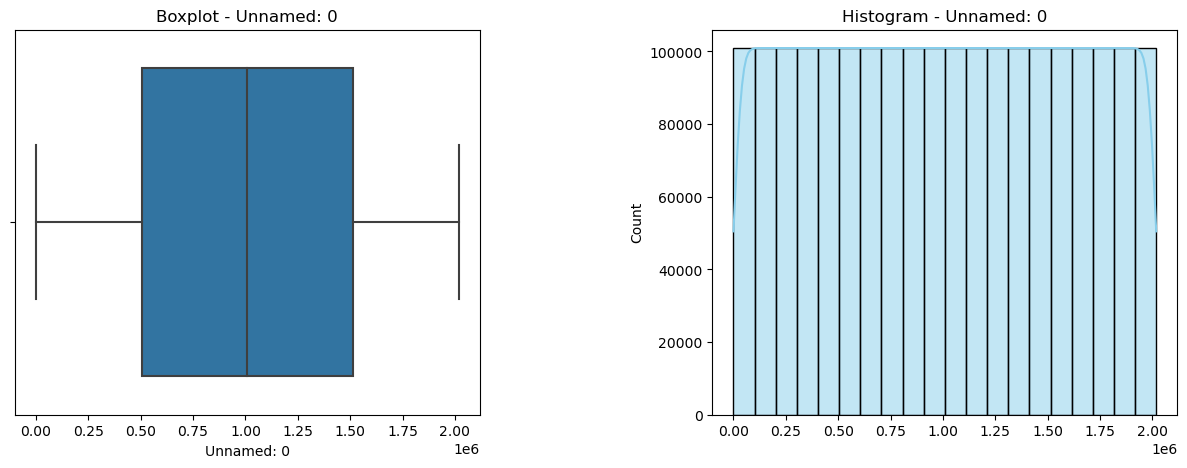

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


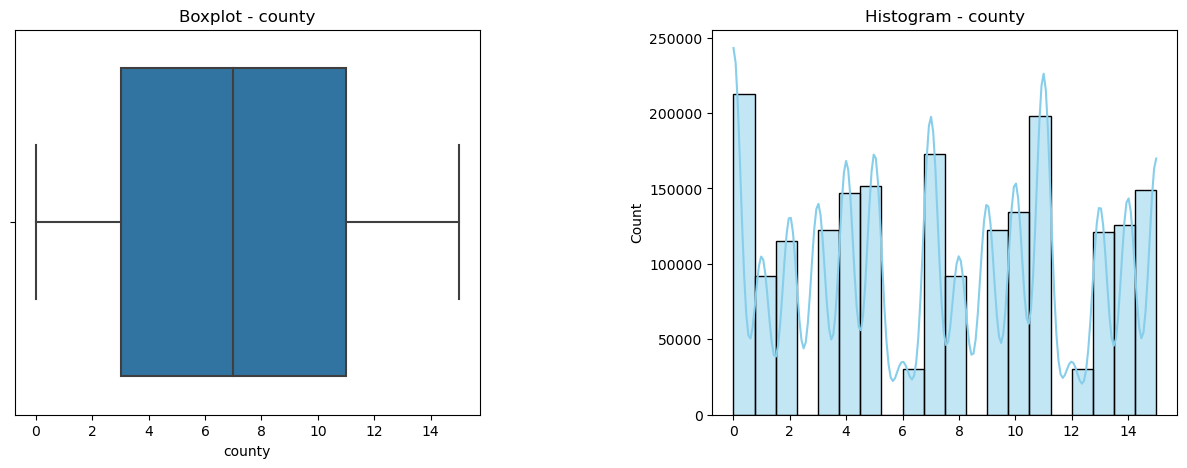

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


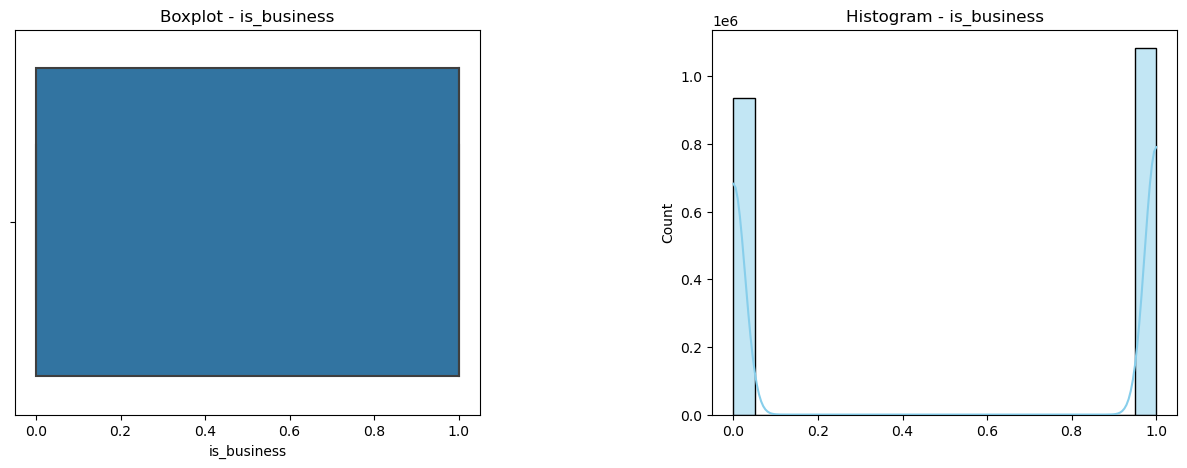

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


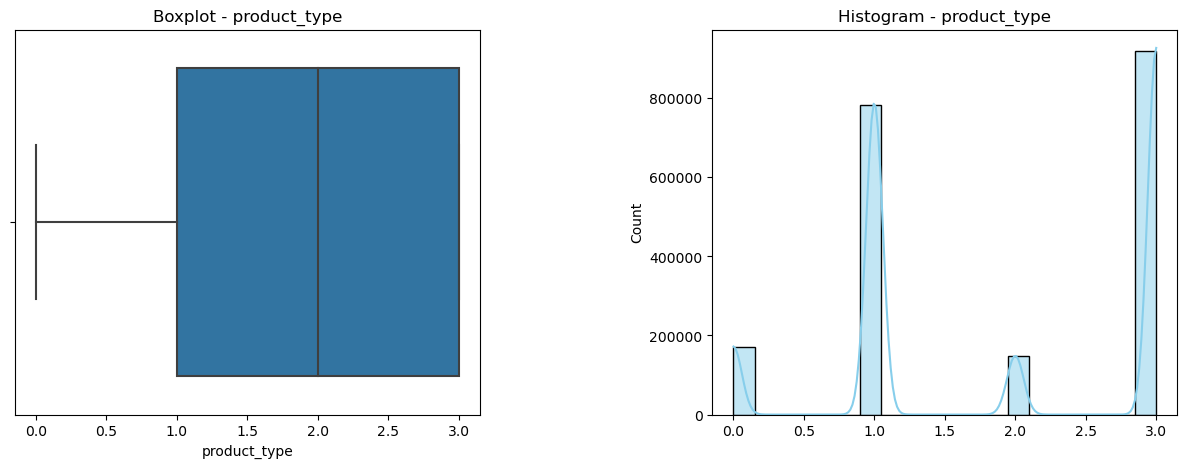

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


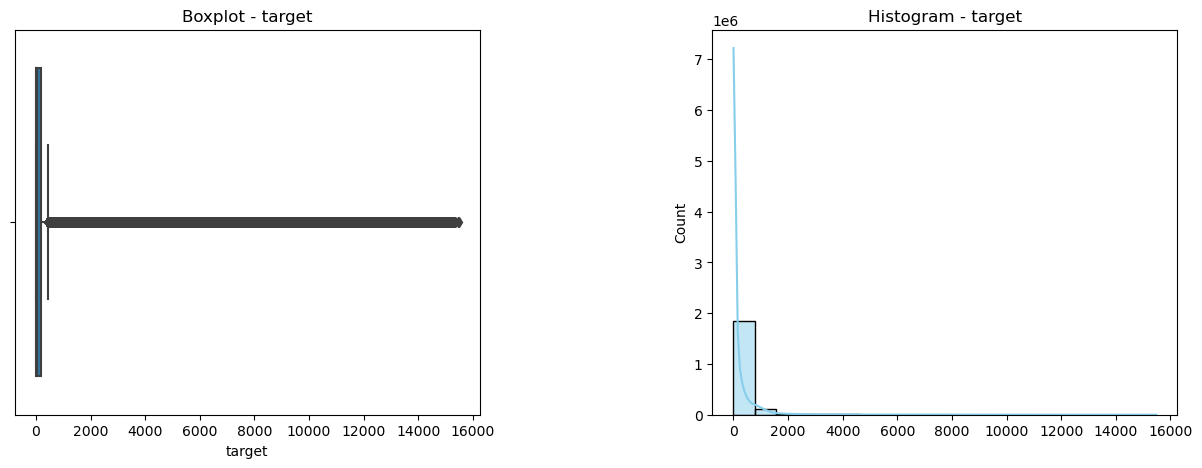

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


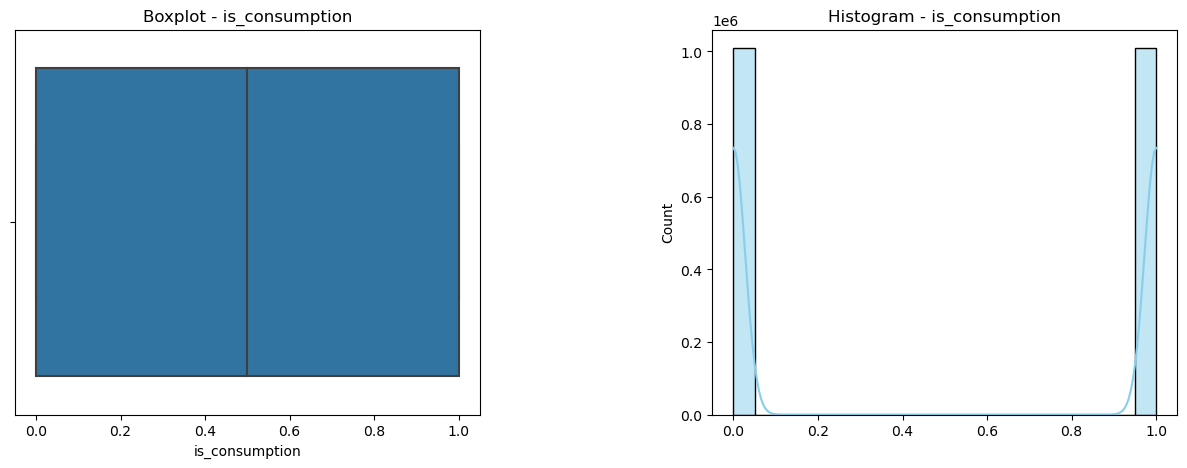

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


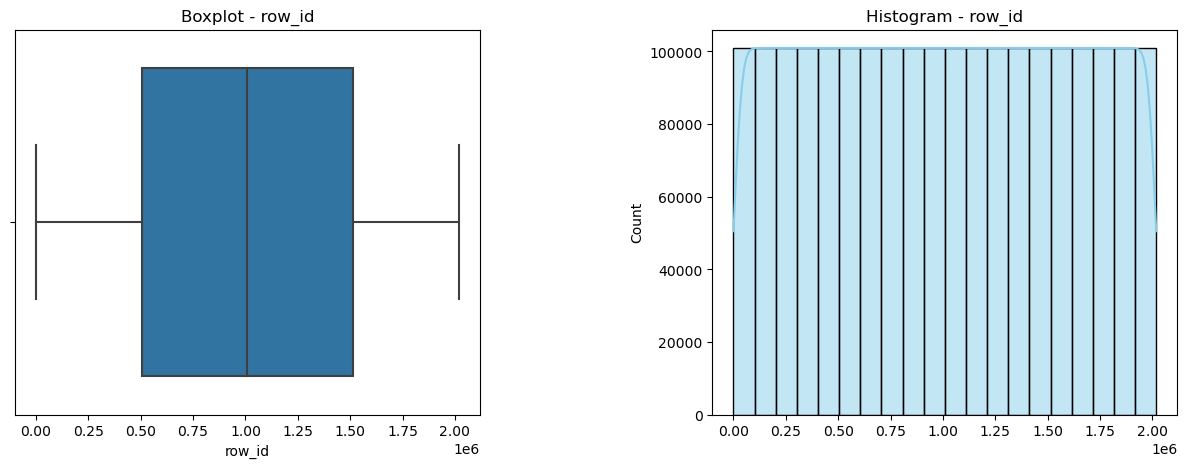

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


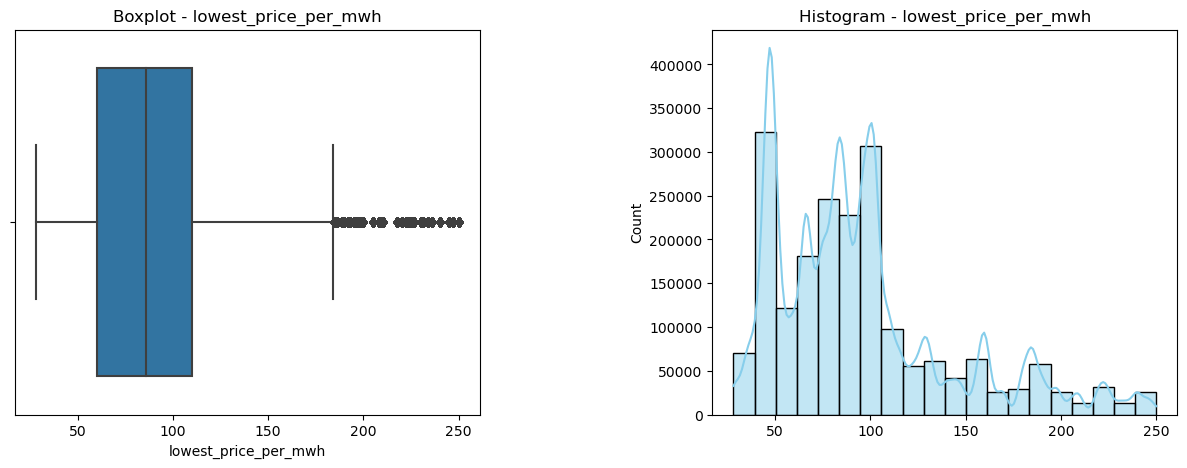

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


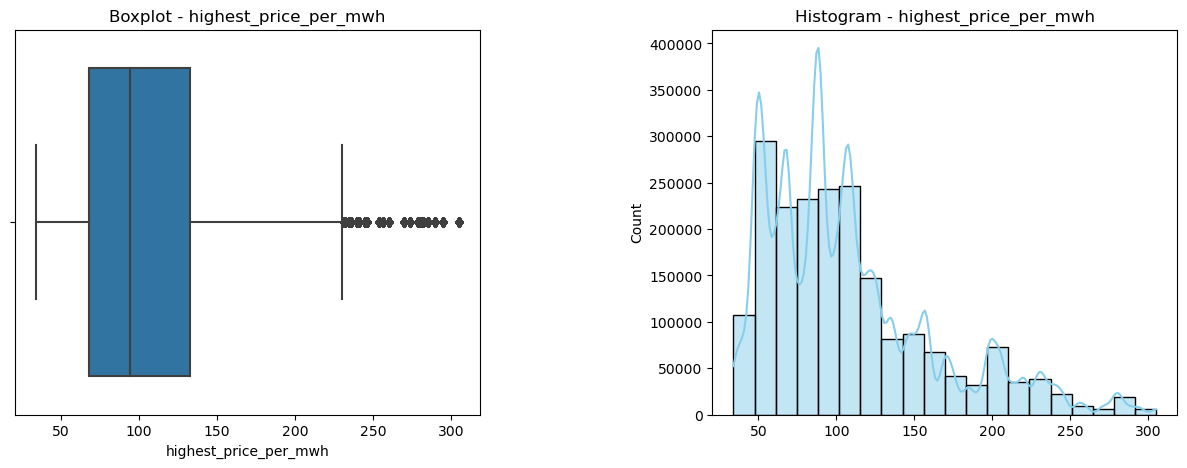

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


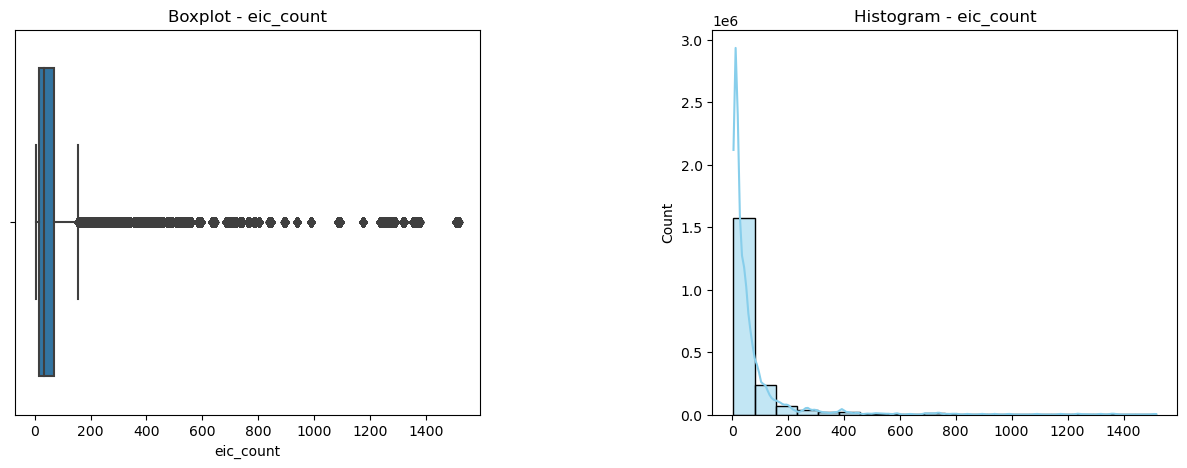

In [6]:
# Plot box plots and histograms for each column
for col in final_df.columns[0:10]:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.subplots_adjust(wspace=0.5)

    # Box plot
    sns.boxplot(x=final_df[col], ax=axes[0])
    axes[0].set_title(f'Boxplot - {col}')

    # Histogram
    sns.histplot(final_df[col], bins=20, kde=True, ax=axes[1], color='skyblue')
    axes[1].set_title(f'Histogram - {col}')
    axes[1].set_xlabel(None)  # Remove x-axis label for better layout

    plt.show()


# Data Validation and Cleansing

**Converting Datatypes to reduce memory usage**

In [7]:
cleaned_final_df=final_df.copy()

In [8]:
for column in final_df.columns:
    # Check if dtype is int64
    if cleaned_final_df[column].dtype == 'int64' or cleaned_final_df[column].dtype == 'uint32':
        # Convert to int16
        cleaned_final_df[column] = cleaned_final_df[column].astype('int16')
     



**Handling Null Values**

In [9]:
null_columns=cleaned_final_df.columns[cleaned_final_df.isnull().any()]
cleaned_final_df[null_columns].tail()

,target,lowest_price_per_mwh,highest_price_per_mwh,eic_count,installed_capacity,euros_per_mwh,hours_ahead,temperature,dewpoint,cloudcover_high,...,shortwave_radiation_hlw,direct_solar_radiation_hlw,diffuse_radiation_hlw,target_1,target_2,target_3,target_4,target_5,target_6,target_7
2018347,197.233,29.0,34.0,15.0,620.0,-1.29,44.0,11.729009,5.960873,0.416247,...,541.8,442.8,99.0,188.167,173.048,184.072,188.122,356.783,415.530,421.707
2018348,0.000,29.0,34.0,20.0,624.5,-1.29,44.0,11.729009,5.960873,0.416247,...,541.8,442.8,99.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2018349,28.404,29.0,34.0,20.0,624.5,-1.29,44.0,11.729009,5.960873,0.416247,...,541.8,442.8,99.0,31.484,35.217,38.646,32.809,36.611,31.286,33.179
2018350,0.000,29.0,34.0,55.0,2188.2,-1.29,44.0,11.729009,5.960873,0.416247,...,541.8,442.8,99.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2018351,196.240,29.0,34.0,55.0,2188.2,-1.29,44.0,11.729009,5.960873,0.416247,...,541.8,442.8,99.0,177.056,161.650,183.756,189.933,188.689,195.707,170.890


In [10]:
null_value_df = pd.DataFrame(data={'Column Name': cleaned_final_df.columns, 'Null Values': [cleaned_final_df[col].isnull().sum() for col in cleaned_final_df.columns]}, columns=['Column Name', 'Null Values'])
null_value_df.head(135)

,Column Name,Null Values
0,Unnamed: 0,0
1,county,0
2,is_business,0
3,product_type,0
4,target,528
...,...,...
130,year,0
131,category_1,0
132,sin(dayofyear),0
133,cos(dayofyear),0


**Removing all those rows where more than 8 columns have null values**

In [11]:
import pandas as pd

# Assuming df is your DataFrame
# Replace 'your_column_name' with the actual column name you're checking for missing values

threshold = 8  # Define the threshold for missing values

# Count NaN values in each row+
nan_values_count = final_df.isnull().sum(axis=1)

# Identify rows with more than the threshold of NaN values
rows_to_drop = nan_values_count[nan_values_count > threshold].index

# Drop the identified rows
cleaned_final_df = cleaned_final_df.drop(rows_to_drop)

# Reset index after dropping rows
cleaned_final_df = cleaned_final_df.reset_index(drop=True)


In [12]:
cleaned_final_df.shape

(1960494, 136)

In [13]:
cleaned_final_df.isnull().sum()

Unnamed: 0          0
county              0
is_business         0
product_type        0
target            258
                 ... 
category_1          0
sin(dayofyear)      0
cos(dayofyear)      0
sin(hour)           0
cos(hour)           0
Length: 136, dtype: int64

**Checking left over null values**

In [14]:
null_columns=cleaned_final_df.columns[cleaned_final_df.isnull().any()]
null_df=cleaned_final_df[null_columns]


# Assuming final_df is your DataFrame
null_value_df = pd.DataFrame(data={'Column Name': null_df.columns, 'Null Values': [null_df[col].isnull().sum() for col in null_df.columns]}, columns=['Column Name', 'Null Values',])
null_value_df

,Column Name,Null Values
0,target,258
1,eic_count,672
2,installed_capacity,672
3,euros_per_mwh,262
4,target_1,1192
5,target_2,2440
6,target_3,3686
7,target_4,4836
8,target_5,5844
9,target_6,6640


**Checking distribution of remaining columns having null values**

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


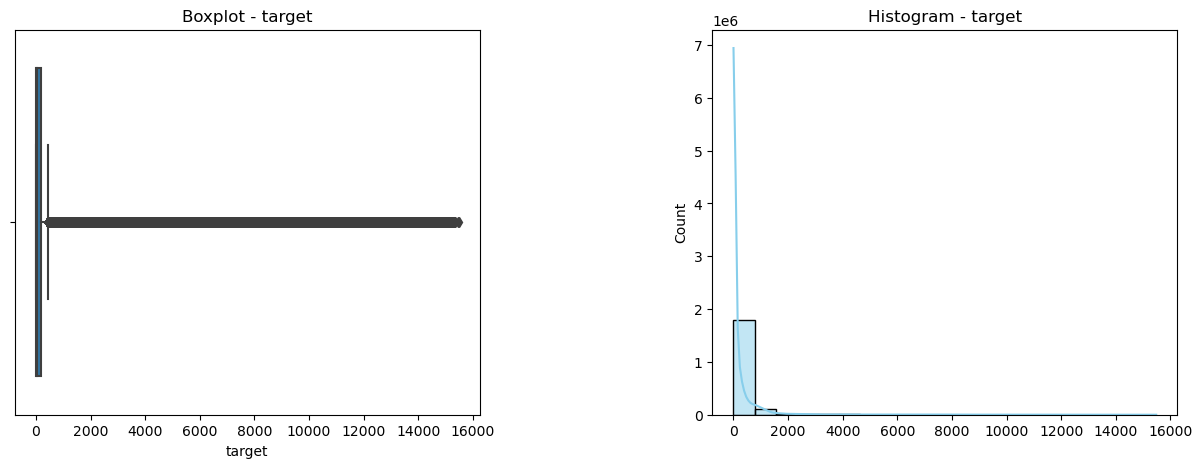

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


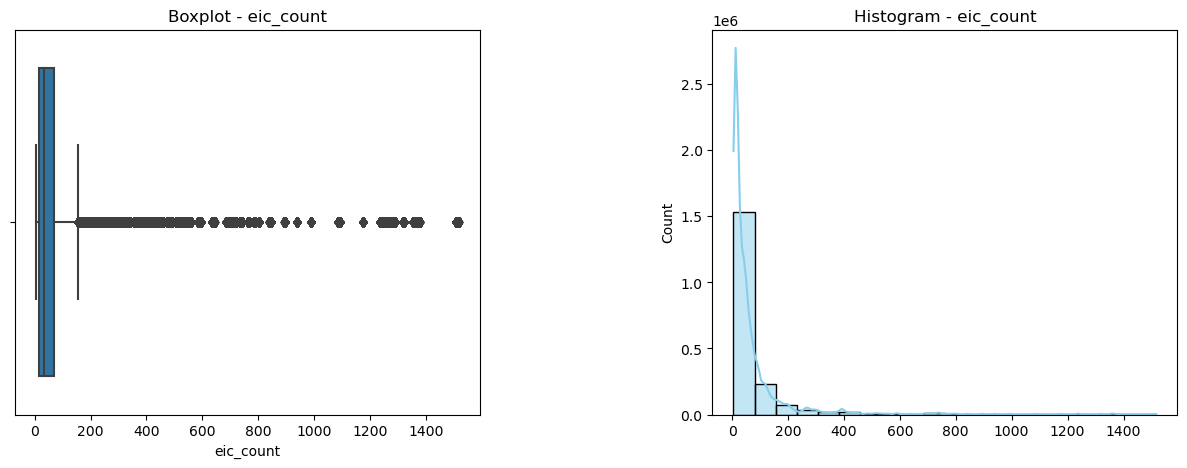

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


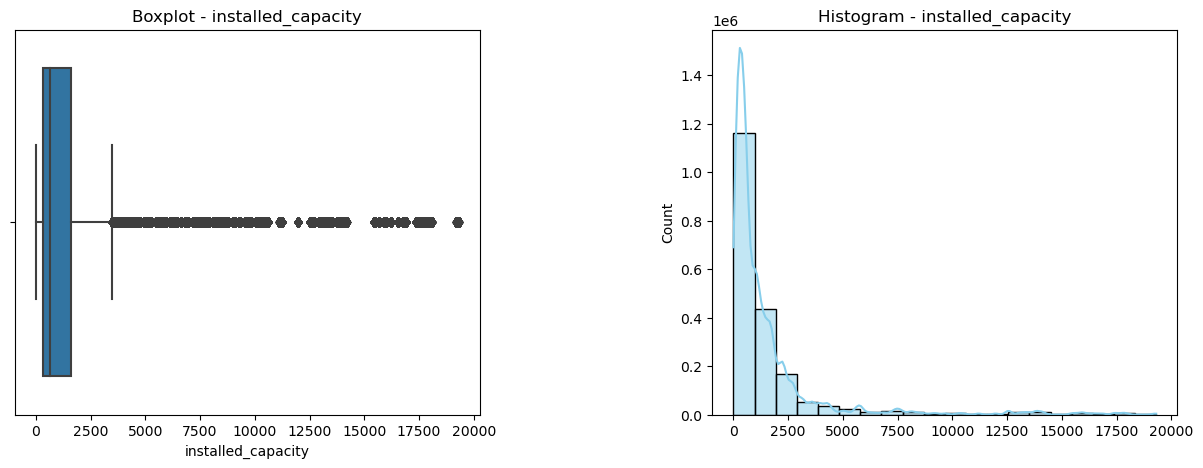

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


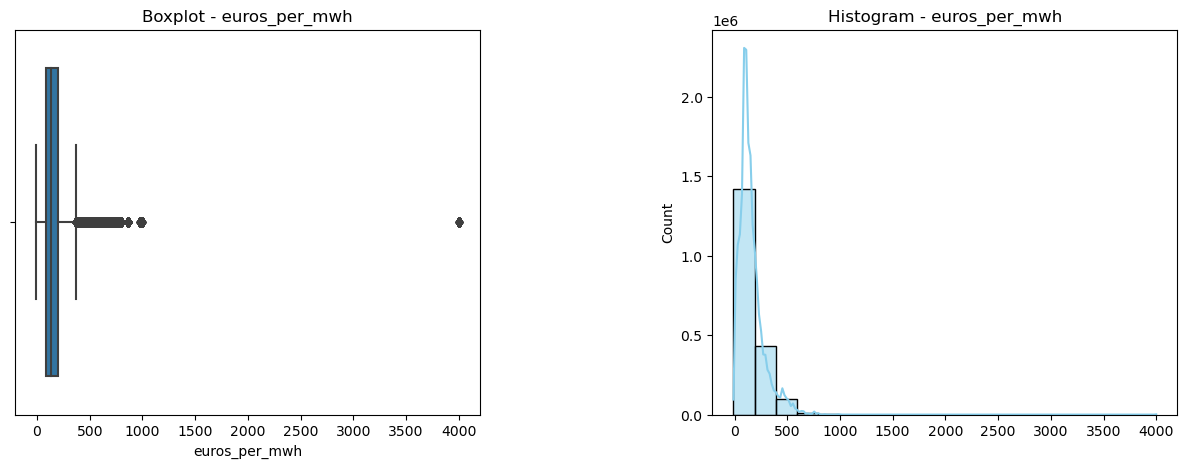

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


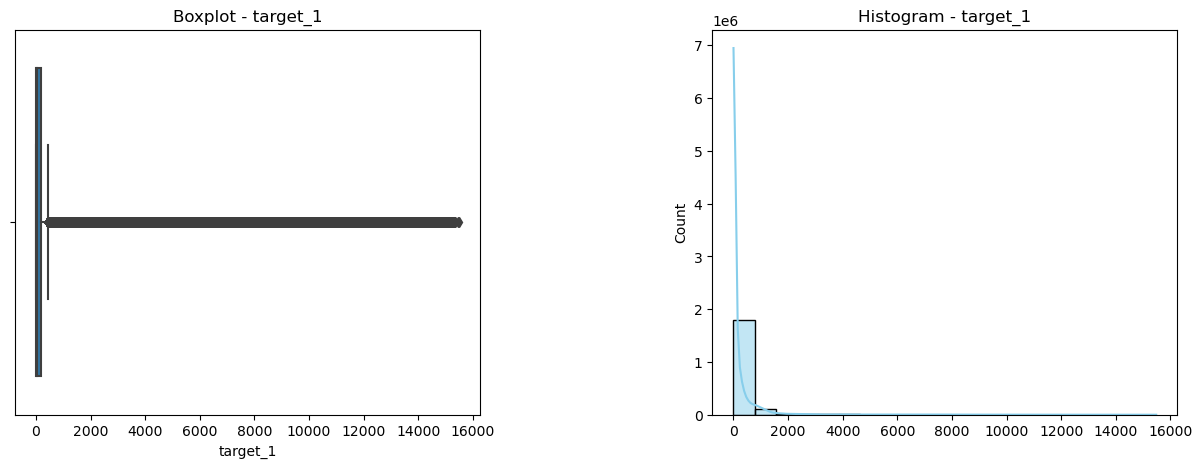

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


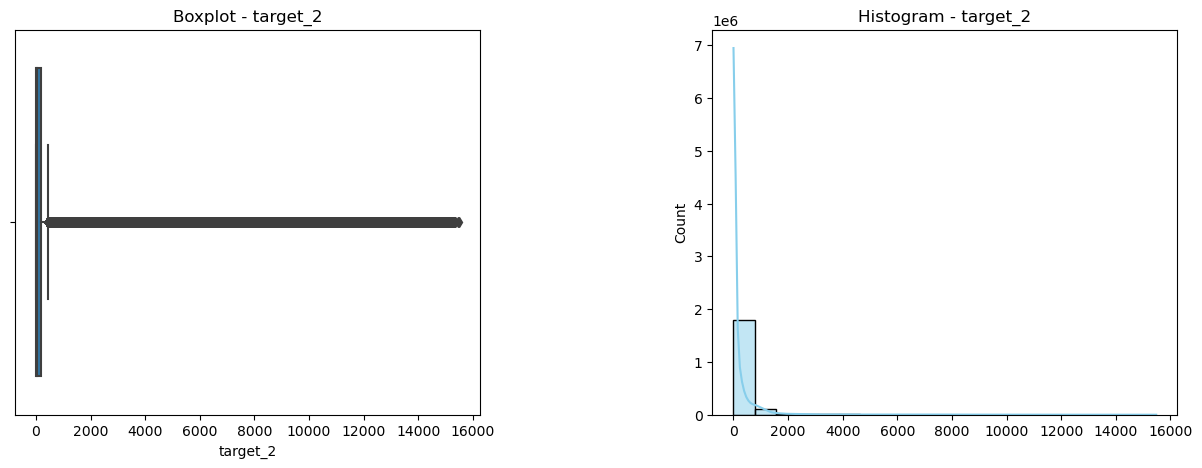

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


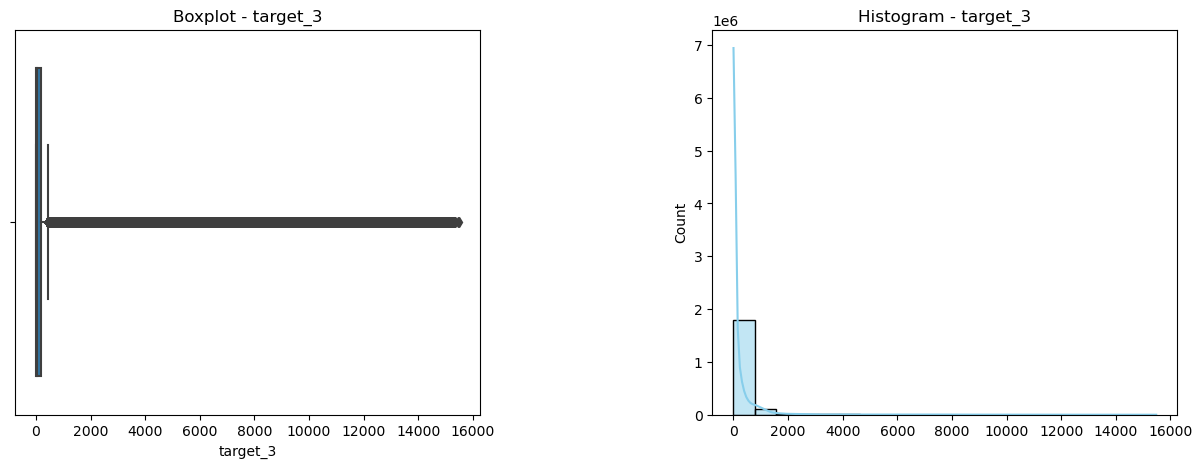

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


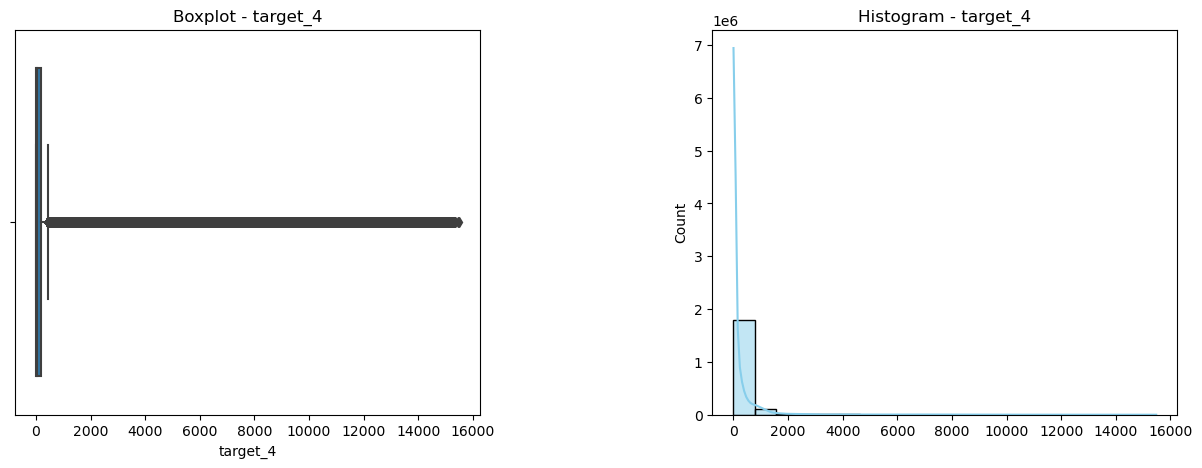

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


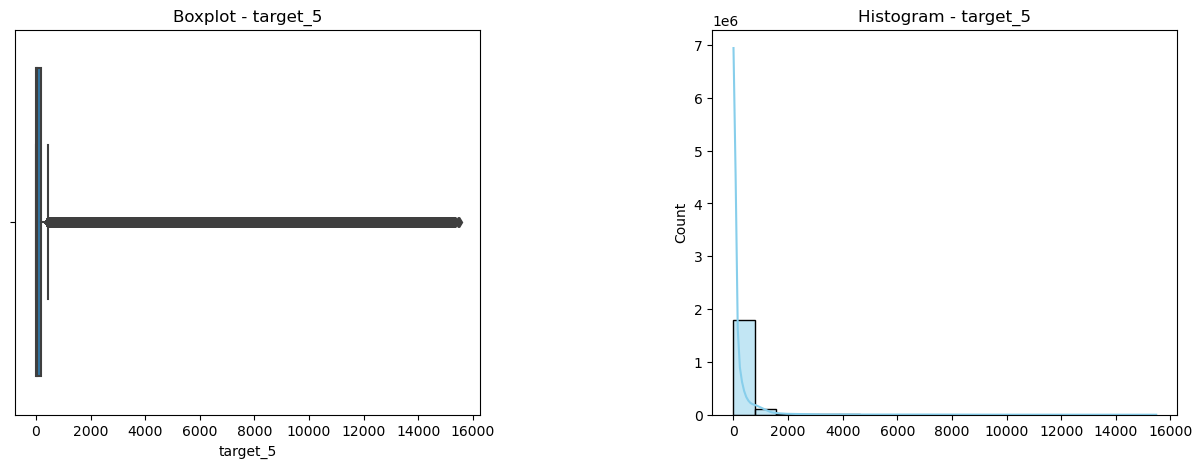

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


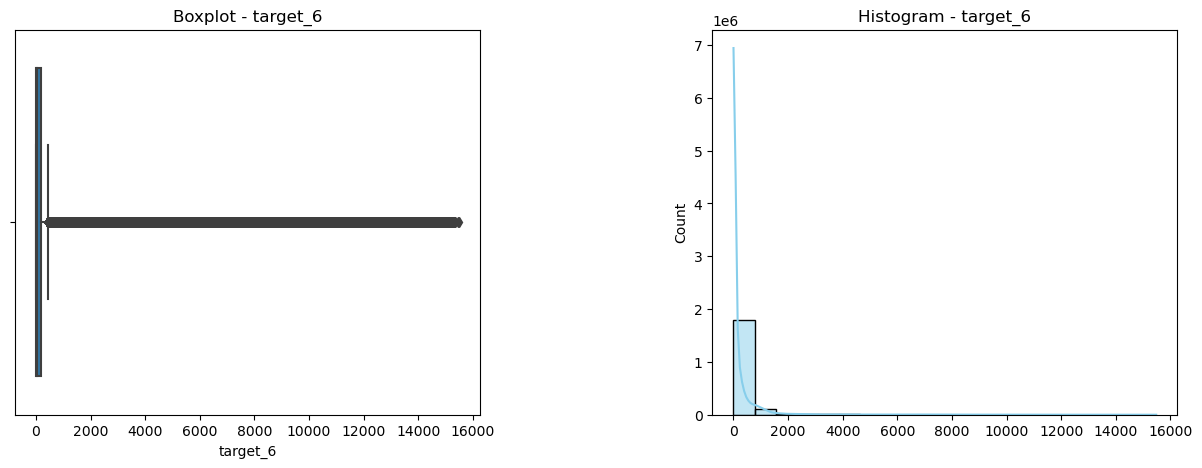

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


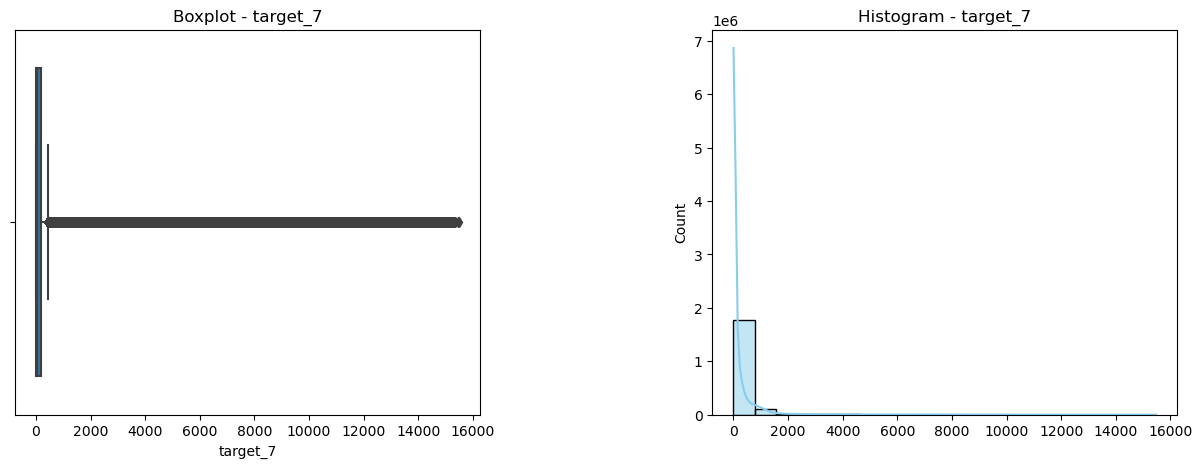

In [15]:
# Plot box plots and histograms for each column
for col in null_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.subplots_adjust(wspace=0.5)

    # Box plot
    sns.boxplot(x=null_df[col], ax=axes[0])
    axes[0].set_title(f'Boxplot - {col}')

    # Histogram
    sns.histplot(null_df[col], bins=20, kde=True, ax=axes[1], color='skyblue')
    axes[1].set_title(f'Histogram - {col}')
    axes[1].set_xlabel(None)  # Remove x-axis label for better layout

    plt.show()


**Imputing null remaining null values with median : As these columns contain many outliers**

In [14]:
# List of columns to impute
columns_to_impute = ['target', 'eic_count', 'installed_capacity', 'euros_per_mwh', 
                      'target_1', 'target_2', 'target_3', 'target_4', 'target_5', 'target_6', 'target_7']

# Impute null values with median for each column
for column in columns_to_impute:
    median_value = cleaned_final_df[column].median()
    cleaned_final_df[column].fillna(median_value, inplace=True)

# Verify that null values have been imputed
cleaned_final_df.isnull().sum()


Unnamed: 0        0
county            0
is_business       0
product_type      0
target            0
                 ..
category_1        0
sin(dayofyear)    0
cos(dayofyear)    0
sin(hour)         0
cos(hour)         0
Length: 136, dtype: int64

### Handling Outliers Using Flooring and Capping

In [15]:

# Assuming final_df is your DataFrame
# Ensure numeric columns only
numeric_columns = cleaned_final_df.select_dtypes(include=[np.number])

# Set floor and cap percentiles
floor_percentile = 10
cap_percentile = 90

# Calculate floor and cap values for each numeric column
floors = numeric_columns.quantile(floor_percentile / 100)
caps = numeric_columns.quantile(cap_percentile / 100)

# Apply flooring and capping to each numeric column
cleaned_final_df[numeric_columns.columns] = numeric_columns.apply(lambda x: np.clip(x, floors[x.name], caps[x.name]))



In [16]:
cleaned_final_df.to_csv('cleaned_final_df')

# Visualizations

## Cheking the distribution of target variable

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):


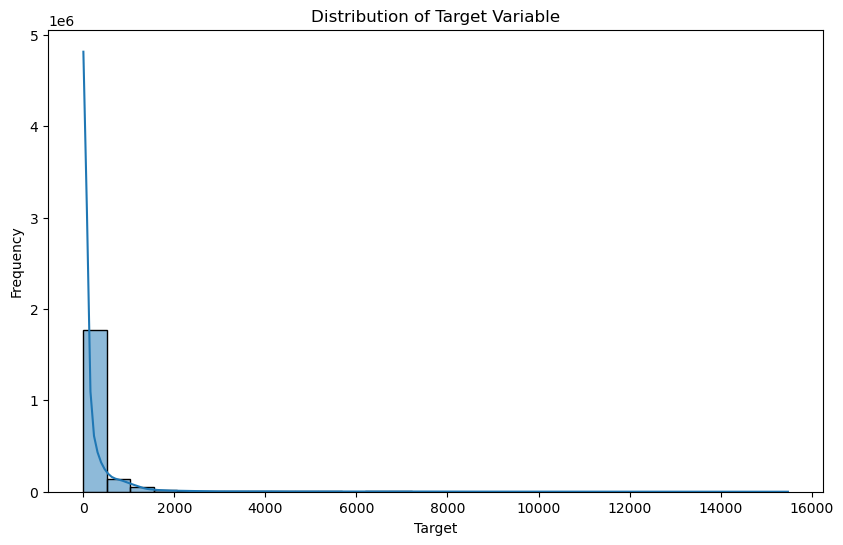

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(final_df['target'], bins=30, kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()


>**Observation**:One key observation is that the majority of values tend to cluster towards the lower end, indicating a right-skewed distribution. This skewness suggests that there is a concentration of data points on the left side of the distribution, with fewer instances of higher values on the right.

## Plotting monthly influence of temperature on target

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

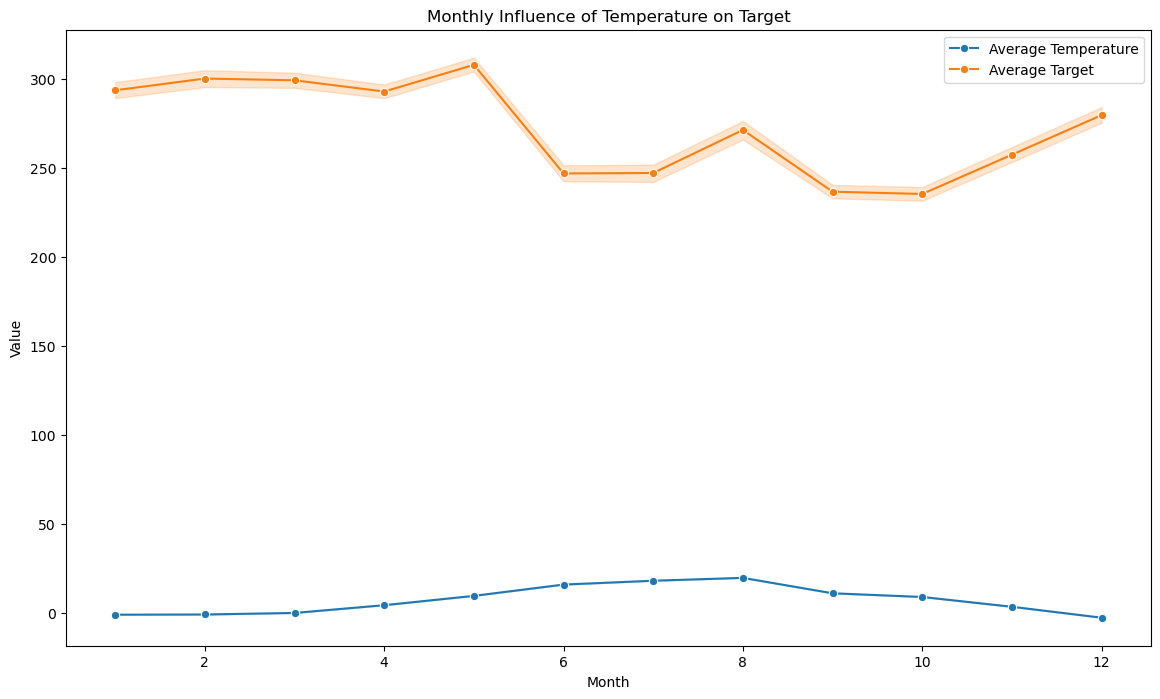

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df_data
# If you haven't loaded your data yet, replace this with your data loading code

# Convert 'month' to categorical for proper ordering
final_df['month'] = pd.Categorical(final_df['month'], categories=range(1, 13), ordered=True)

# Line plot for monthly average temperature and target
plt.figure(figsize=(14, 8))
sns.lineplot(x='month', y='temperature', data=final_df, label='Average Temperature', marker='o')
sns.lineplot(x='month', y='target', data=final_df, label='Average Target', marker='o')
plt.title('Monthly Influence of Temperature on Target')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.show()


>**Observation**:The plot visualizes the monthly influence of temperature on the target variable, offering a concise overview of how temperature fluctuations correlate with changes in the target. This analysis helps identify potential seasonal patterns or trends in the impact of temperature on the target variable over the course of the year.


## Visualizing change in energy production/consumption with respect to year

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):


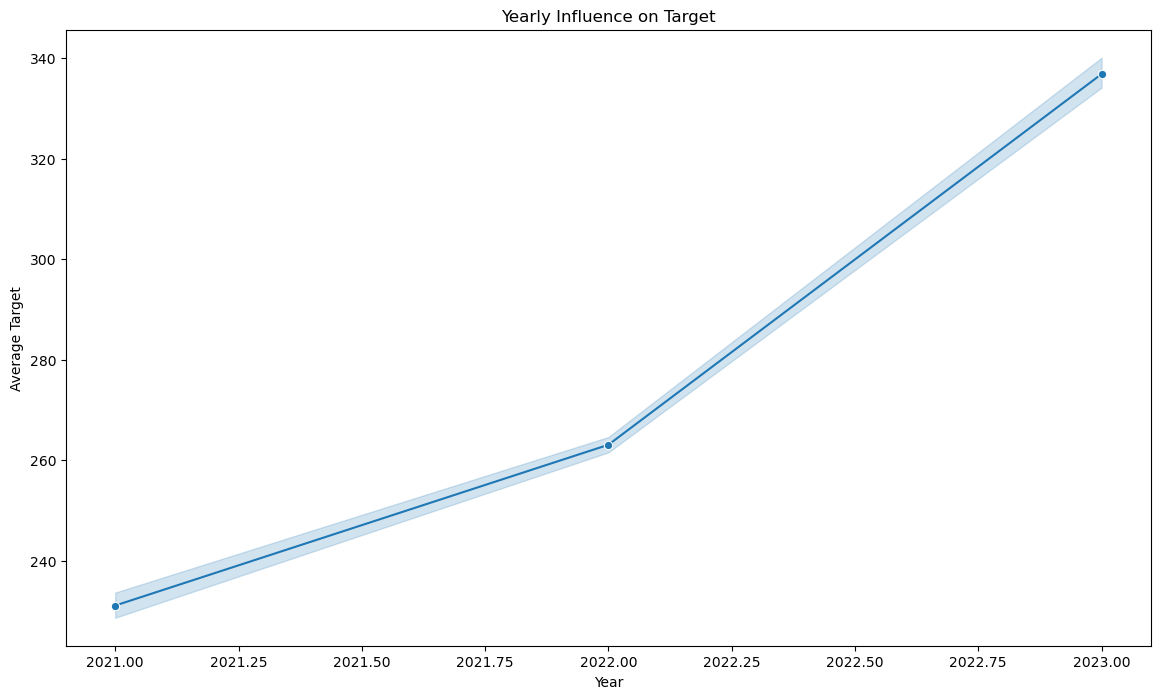

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df_data
# If you haven't loaded your data yet, replace this with your data loading code

# Line plot for yearly average target
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='target', data=final_df, marker='o')
plt.title('Yearly Influence on Target')
plt.xlabel('Year')
plt.ylabel('Average Target')
plt.show()


>**Observation**: A visual representation of the change in energy production or consumption with respect to the year offers a quick insight into trends over time. From this graph we can observe a jump in average production usage and consumption from 2022

## Plotting average energy consumption/production  with respect to weekdays

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7948\2492074405.py:9: FutureWarning: 



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



  sns.barplot(x='weekday', y='target', data=final_df, ci=None)


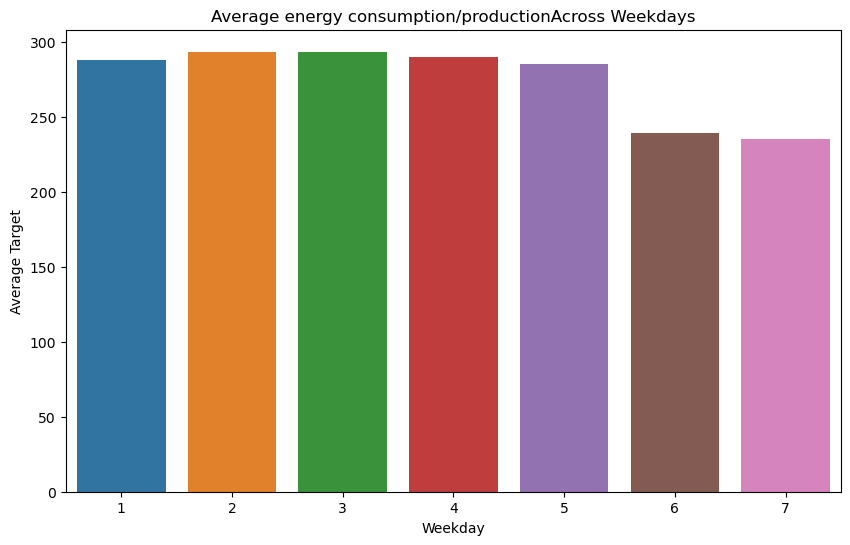

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df_data
# If you haven't loaded your data yet, replace this with your data loading code

# Bar plot for average target across weekdays
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='target', data=final_df, ci=None)
plt.title('Average energy consumption/productionAcross Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Average Target')
plt.show()


>**Observation**:The presented bar graph illustrates the average energy consumption/production across weekdays, with the 'target' variable plotted against the days of the week. Notably, the graph reveals a higher average target for weekdays in comparison to weekends. This observed distinction suggests a discernible variation in energy utilization patterns between weekdays and weekends. The higher average target on weekdays may be attributed to increased energy demand associated with business and industrial activities during the workweek, while the comparatively lower values on weekends may indicate reduced energy consumption in residential and commercial sectors. This insight is crucial for energy planning and resource allocation, emphasizing the need for tailored strategies to accommodate the divergent consumption patterns observed between weekdays and weekends.


## Visualizing how target column is influenced if is_business is true or not

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):


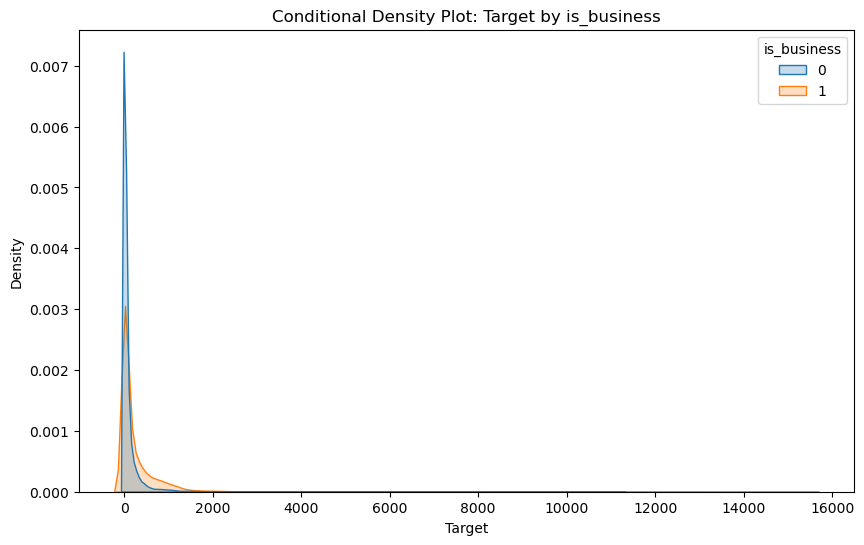

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df_data
# If you haven't loaded your data yet, replace this with your data loading code

# Conditional density plot (Kernel density plot)
plt.figure(figsize=(10, 6))
sns.kdeplot(x='target', hue='is_business', data=final_df, fill=True, common_norm=False)
plt.title('Conditional Density Plot: Target by is_business')
plt.xlabel('Target')
plt.ylabel('Density')
plt.show()


>**Observation**:The conditional density plot unveils nuanced insights into consumption patterns based on business categorization. For non-business entities, a pronounced density peak signifies a concentrated distribution of values. In contrast, business entities exhibit a smaller peak, indicative of a divergent distribution pattern. Noteworthy is the confined x-axis range between 0 and 2000 for both business and non-business entities, with a predominant concentration towards the left side. These distinct density patterns underscore potential variations in consumption behavior, providing valuable information for tailored strategies and targeted decision-making in resource allocation and market segmentation.


## Visualizing how target column is influenced if is_consumption is true or not

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):


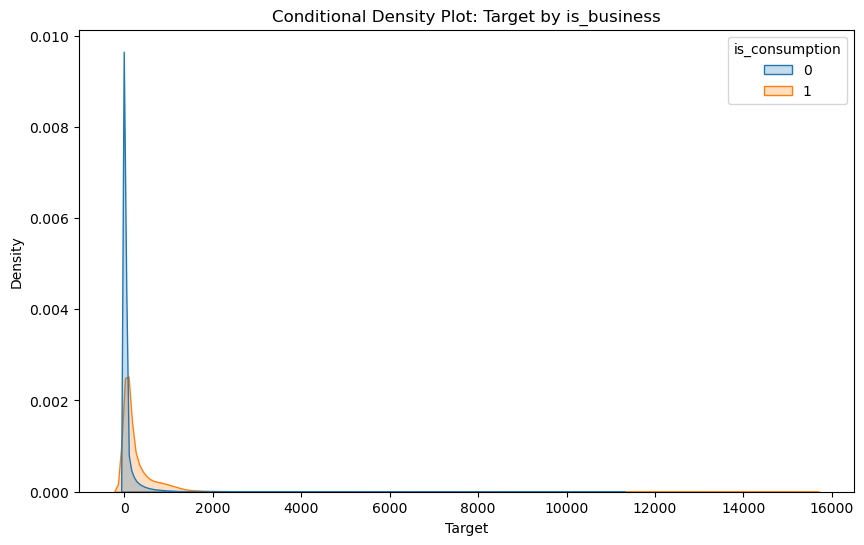

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df_data
# If you haven't loaded your data yet, replace this with your data loading code

# Conditional density plot (Kernel density plot)
plt.figure(figsize=(10, 6))
sns.kdeplot(x='target', hue='is_consumption', data=final_df, fill=True, common_norm=False)
plt.title('Conditional Density Plot: Target by is_business')
plt.xlabel('Target')
plt.ylabel('Density')
plt.show()

>**Observation**:The density plot indicates that when the 'is_consumption' variable is 0 (non-consumption entities), the higher and broader peak suggests a concentrated distribution of values, potentially reflecting consistent non-consumptive behavior. In contrast, when 'is_consumption' is 1 (consumption entities), the smaller, more concentrated peak towards the left suggests a narrower spread of values, hinting at a more defined and potentially predictable range of consumption patterns. These distinct peak characteristics offer insights into the variability and predictability of consumption behavior, providing valuable information for targeted resource allocation.


## Plotting Average yearly consumption with respect to change in euros_per_mwh

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7948\485628795.py:3: FutureWarning: 



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



  sns.lineplot(x='euros_per_mwh', y='target', hue='year', data=final_df, ci=None)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):


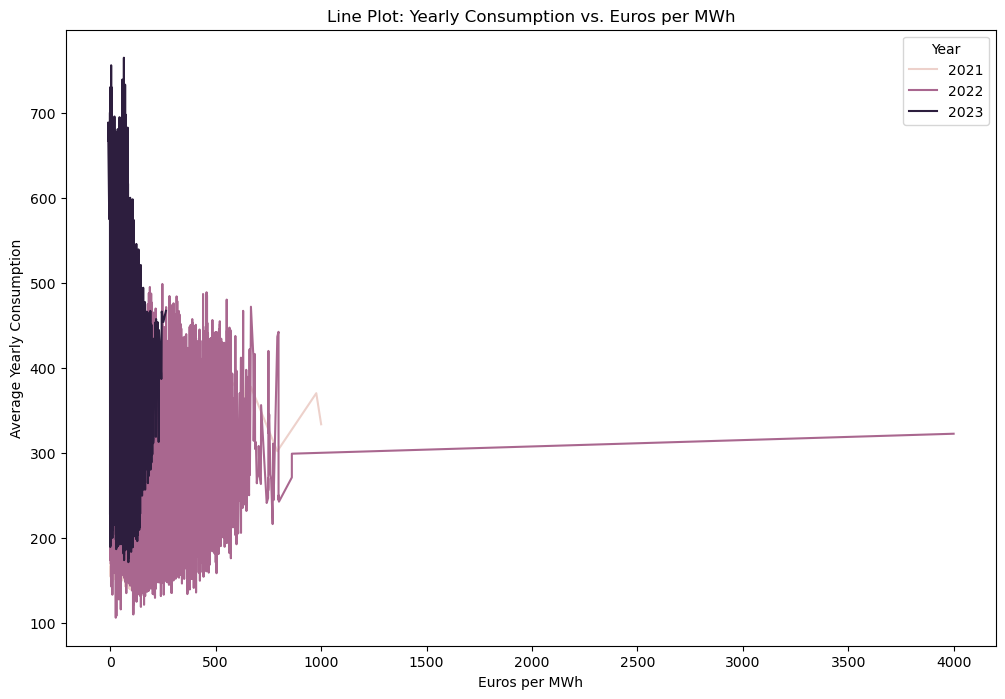

In [24]:

# Assuming df_data has columns: 'year', 'euros_per_mwh', 'target'
plt.figure(figsize=(12, 8))
sns.lineplot(x='euros_per_mwh', y='target', hue='year', data=final_df, ci=None)
plt.title('Line Plot: Yearly Consumption vs. Euros per MWh')
plt.xlabel('Euros per MWh')
plt.ylabel('Average Yearly Consumption')
plt.legend(title='Year')
plt.show()


>**Observation**:The line plot reveals significant insights into the impact of energy cost fluctuations on average yearly consumption. In 2023, a decrease in energy prices coincides with a notable rise in consumption, highlighting the inverse correlation. Conversely, in 2022, the continuous increase in energy prices corresponds to a stagnation in average yearly consumption. These findings underscore the critical interplay between pricing dynamics and consumer behavior, offering valuable implications for strategic decision-making in the energy sector.


## Feature Selection

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot


In [2]:
cleaned_final_df= pd.read_csv('/kaggle/input/cleaned/cleaned_final_df')

**Code Deatils**:This code below is performing feature selection using the f_regression method from scikit-learn. It first splits the dataset into training and testing sets. The select_features function utilizes SelectKBest to identify the most relevant features based on their F-statistic scores in relation to the target variable (y). The sorted feature names and their corresponding scores are then printed in descending order, providing insights into the importance of each feature. This process helps identify which features contribute significantly to predicting the target variable and can be crucial for improving model performance and interpretability.








In [3]:
X =cleaned_final_df.drop(columns=['target','target_1','target_2','target_3','target_4','target_5','target_6','target_7'])   #independent columns
y =cleaned_final_df['target']   #target column i.e price range
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

def select_features(X_train, X_test, y_train, y_test, k='all'):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=k)
    
    # learn the relationship from training data
    fs.fit(X_train, y_train)
    
    # transform train and test input data
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs

# Assuming you have loaded your data into X_train, X_test, y_train, and y_test

# Select features using correlation-based feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, X_test, y_train, y_test)
feature_names = X_train.columns

# Sort feature names and scores in descending order
sorted_feature_indices = (-fs.scores_).argsort()
sorted_feature_names = feature_names[sorted_feature_indices]
sorted_feature_scores = fs.scores_[sorted_feature_indices]

# Print sorted feature names and scores
for feature_name, score in zip(sorted_feature_names, sorted_feature_scores):
    print(f'Feature {feature_name}: {score}')




Feature installed_capacity: 464580.35337410937
Feature is_consumption: 224312.87535045642
Feature eic_count: 111059.48322159126
Feature is_business: 88675.02110045728
Feature product_type: 75572.31669975644
Feature surface_solar_radiation_downwards_fl: 34813.06925743253
Feature surface_solar_radiation_downwards: 33485.328650377865
Feature direct_solar_radiation: 29097.622521130932
Feature direct_solar_radiation_fl: 28338.008542605938
Feature surface_solar_radiation_downwards_fdw: 28242.58885608786
Feature surface_solar_radiation_downwards_flw: 27536.93510198532
Feature cos(hour): 22807.350516276692
Feature direct_solar_radiation_fdw: 20433.774076163398
Feature direct_solar_radiation_flw: 17346.403965633428
Feature diffuse_radiation_hdw: 10680.325952282648
Feature diffuse_radiation_hlw: 10585.828712225562
Feature diffuse_radiation: 9918.439213812788
Feature diffuse_radiation_hl: 9829.73599548422
Feature shortwave_radiation_hdw: 9462.340603996705
Feature shortwave_radiation_hlw: 9294.950

**Code Details**:From the sorted features according to their importance with respect to target variable, selecting top 40 features.

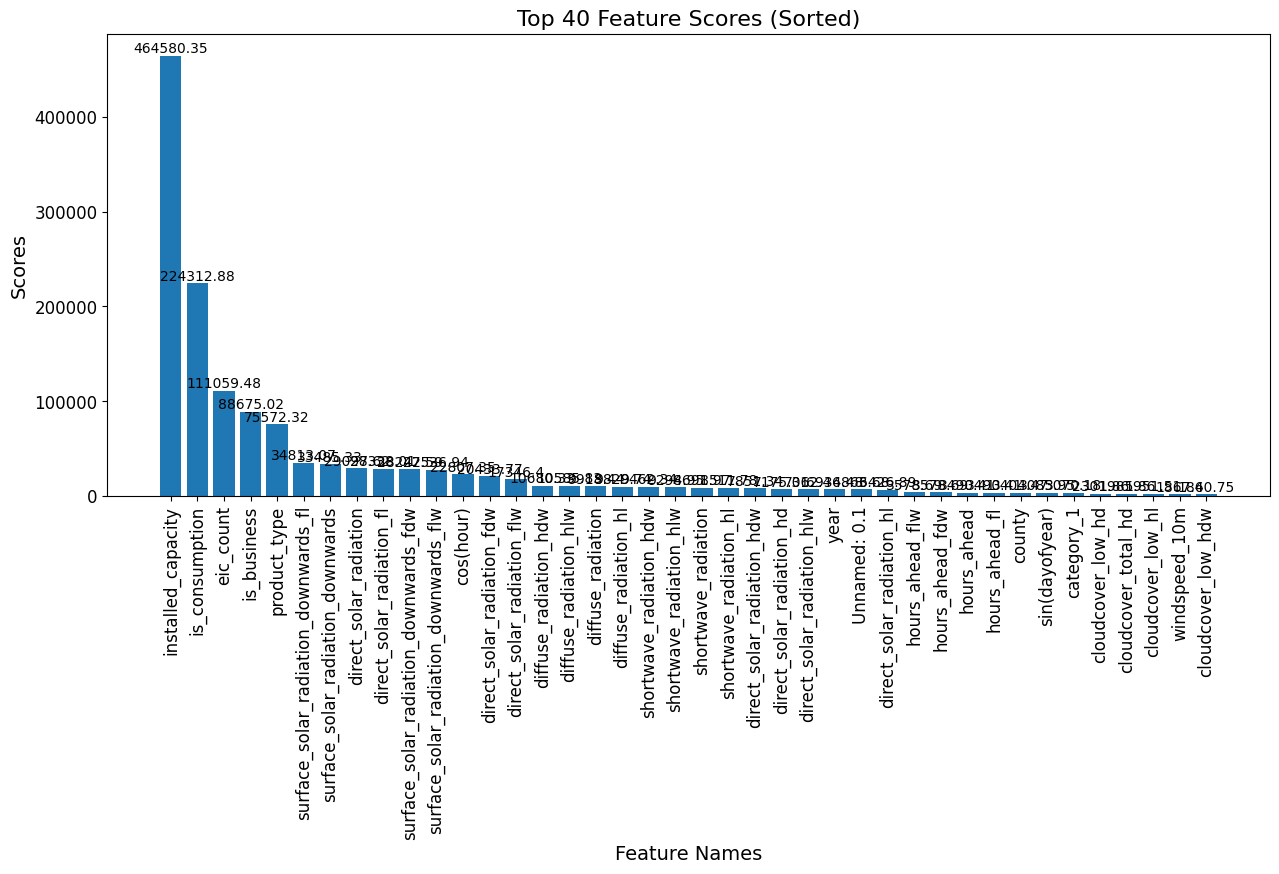

In [19]:
# Select the top 40 features
top_features = 40
top_feature_names = sorted_feature_names[:top_features]
top_feature_scores = sorted_feature_scores[:top_features]

# Plot the scores with increased font size for the top 50 features
plt.figure(figsize=(15, 6))  # Set the figure size to a larger value

bar_plot = plt.bar(top_feature_names, top_feature_scores)
plt.xticks(rotation='vertical', fontsize=12)  # Increase font size and rotate x-axis labels
plt.yticks(fontsize=12)  # Increase font size of y-axis labels
plt.xlabel('Feature Names', fontsize=14)  # Increase font size of x-axis label
plt.ylabel('Scores', fontsize=14)  # Increase font size of y-axis label
plt.title('Top 40 Feature Scores (Sorted)', fontsize=16)  # Increase font size of the title

# Add values on top of the bars for better readability
for bar in bar_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.show()


**Saving selected features and reading them along with target variable**: Run 3 below cells if short if memory

In [20]:
selected_features = cleaned_final_df[top_feature_names]

selected_features.to_csv('top-selected-features')

In [8]:
selected_features=pd.read_csv('/kaggle/input/features/top-selected-features')

In [11]:
target=pd.read_csv('/kaggle/input/features/target')

# MODELING

## Applyling Linear Regression as Baseline Model

In [21]:
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'target' is the target variable
target_variable = target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target_variable, test_size=0.2, random_state=42)

# Fit a linear regression model
start_time_train = time.time()
model = LinearRegression()
model.fit(X_train, y_train)
end_time_train = time.time()

# Make predictions on the training set
start_time_predict_train = time.time()
y_pred_train = model.predict(X_train)
end_time_predict_train = time.time()

# Make predictions on the test set
start_time_predict_test = time.time()
y_pred_test = model.predict(X_test)
end_time_predict_test = time.time()

# Calculate training time
training_time = end_time_train - start_time_train

# Calculate prediction time for the training set
prediction_time_train = end_time_predict_train - start_time_predict_train

# Calculate prediction time for the test set
prediction_time_test = end_time_predict_test - start_time_predict_test

# Evaluate the model performance
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Calculate RMSE and MAPE for both training and test sets
rmse_train = np.sqrt(mse_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Print results
print(f'Training Time: {training_time} seconds')
print(f'Prediction Time (Training Set): {prediction_time_train} seconds')
print(f'Prediction Time (Test Set): {prediction_time_test} seconds')

print('\nEvaluation Metrics on Training Set:')
print(f'Mean Squared Error (MSE): {mse_train}')
print(f'R-squared (R2): {r2_train}')
print(f'Root Mean Squared Error (RMSE): {rmse_train}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_train}%')

print('\nEvaluation Metrics on Test Set:')
print(f'Mean Squared Error (MSE): {mse_test}')
print(f'R-squared (R2): {r2_test}')
print(f'Root Mean Squared Error (RMSE): {rmse_test}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_test}%')


Training Time: 7.230328798294067 seconds
Prediction Time (Training Set): 4.096262454986572 seconds
Prediction Time (Test Set): 1.4435696601867676 seconds

Evaluation Metrics on Training Set:
Mean Squared Error (MSE): 11312.465552954029
R-squared (R2): 0.7408931103952423
Root Mean Squared Error (RMSE): 106.36007499505644
Mean Absolute Percentage Error (MAPE): inf%

Evaluation Metrics on Test Set:
Mean Squared Error (MSE): 11357.242020264855
R-squared (R2): 0.7407464389229992
Root Mean Squared Error (RMSE): 106.57036182853493
Mean Absolute Percentage Error (MAPE): inf%


## Using Interaction features

In [6]:
from sklearn.preprocessing import PolynomialFeatures
# Assuming selected_features is your DataFrame with the top 40 featuresa
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
selected_features_interactions = poly.fit_transform(selected_features)

In [7]:
np.save('feature_interactions',selected_features_interactions)

In [4]:
selected_features_interactions=np.load('/kaggle/working/feature_interactions.npy')

In [14]:
type(selected_features_interactions[0][0])

numpy.float64

In [16]:
selected_features_interactions=selected_features_interactions.astype(np.float32)
np.save('feature_interactions',selected_features_interactions)

## Applying Linear Regression again with interaction features only

In [5]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Assuming 'target' is the target variable
target_variable = target['target']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features_interactions, target_variable, test_size=0.2, random_state=42)


# Fit a linear regression model
start_time_train = time.time()
model = LinearRegression()
model.fit(X_train, y_train)
end_time_train = time.time()

# Make predictions on the training set
start_time_predict_train = time.time()
y_pred_train = model.predict(X_train)
end_time_predict_train = time.time()

# Make predictions on the test set
start_time_predict_test = time.time()
y_pred_test = model.predict(X_test)
end_time_predict_test = time.time()

# Calculate training time
training_time = end_time_train - start_time_train

# Calculate prediction time for the training set
prediction_time_train = end_time_predict_train - start_time_predict_train

# Calculate prediction time for the test set
prediction_time_test = end_time_predict_test - start_time_predict_test

# Evaluate the model performance
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Calculate RMSE and MAPE for both training and test sets
rmse_train = np.sqrt(mse_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Print results
print(f'Training Time: {training_time} seconds')
print(f'Prediction Time (Training Set): {prediction_time_train} seconds')
print(f'Prediction Time (Test Set): {prediction_time_test} seconds')

print('\nEvaluation Metrics on Training Set:')
print(f'Mean Squared Error (MSE): {mse_train}')
print(f'R-squared (R2): {r2_train}')
print(f'Root Mean Squared Error (RMSE): {rmse_train}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_train}%')

print('\nEvaluation Metrics on Test Set:')
print(f'Mean Squared Error (MSE): {mse_test}')
print(f'R-squared (R2): {r2_test}')
print(f'Root Mean Squared Error (RMSE): {rmse_test}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_test}%')


Training Time: 70.12178921699524 seconds
Prediction Time (Training Set): 0.6445364952087402 seconds
Prediction Time (Test Set): 0.1575021743774414 seconds

Evaluation Metrics on Training Set:
Mean Squared Error (MSE): 24655.49431010055
R-squared (R2): 0.4352770921198743
Root Mean Squared Error (RMSE): 157.02068115410958
Mean Absolute Percentage Error (MAPE): inf%

Evaluation Metrics on Test Set:
Mean Squared Error (MSE): 24713.33716724239
R-squared (R2): 0.4358647411693727
Root Mean Squared Error (RMSE): 157.20476191019912
Mean Absolute Percentage Error (MAPE): inf%


## Results with and without interaction features for Linear Regression model

In [9]:
from prettytable import PrettyTable

# Results data
results_data = [
    {"Model": "Linear Regression (No Interaction)",
     "Training Time": 70.12178921699524,
     "Prediction Time (Training Set)": 0.6445364952087402,
     "Prediction Time (Test Set)": 0.1575021743774414,
     "MSE (Training)": 24655.49431010055,
     "R2 (Training)": 0.4352770921198743,
     "RMSE (Training)": 157.02068115410958,
     "MAPE (Training)": "inf%",
     "MSE (Test)": 24713.33716724239,
     "R2 (Test)": 0.4358647411693727,
     "RMSE (Test)": 157.20476191019912,
     "MAPE (Test)": "inf%"
    },
    {"Model": "Linear Regression (With Interaction)",
     "Training Time": 7.230328798294067,
     "Prediction Time (Training Set)": 4.096262454986572,
     "Prediction Time (Test Set)": 1.4435696601867676,
     "MSE (Training)": 11312.465552954029,
     "R2 (Training)": 0.7408931103952423,
     "RMSE (Training)": 106.36007499505644,
     "MAPE (Training)": "inf%",
     "MSE (Test)": 11357.242020264855,
     "R2 (Test)": 0.7407464389229992,
     "RMSE (Test)": 106.57036182853493,
     "MAPE (Test)": "inf%"
    }
]

# Create and print the table
table = PrettyTable()
table.field_names = results_data[0].keys()
for result in results_data:
    table.add_row([result[key] for key in results_data[0].keys()])

print(table)


+--------------------------------------+-------------------+--------------------------------+----------------------------+--------------------+--------------------+--------------------+-----------------+--------------------+--------------------+--------------------+-------------+
|                Model                 |   Training Time   | Prediction Time (Training Set) | Prediction Time (Test Set) |   MSE (Training)   |   R2 (Training)    |  RMSE (Training)   | MAPE (Training) |     MSE (Test)     |     R2 (Test)      |    RMSE (Test)     | MAPE (Test) |
+--------------------------------------+-------------------+--------------------------------+----------------------------+--------------------+--------------------+--------------------+-----------------+--------------------+--------------------+--------------------+-------------+
|  Linear Regression (No Interaction)  | 70.12178921699524 |       0.6445364952087402       |     0.1575021743774414     | 24655.49431010055  | 0.43527709211

## Applying Random Forest Regressor

In [9]:
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'target' is the target variable
target_variable = target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target_variable, test_size=0.2, random_state=42)

# Apply a random regressor for comparison
start_time_train_random = time.time()
random_regressor = DummyRegressor(strategy='mean')
random_regressor.fit(X_train, y_train)
end_time_train_random = time.time()

# Make predictions on the training set for random regressor
start_time_predict_train_random = time.time()
y_pred_train_random = random_regressor.predict(X_train)
end_time_predict_train_random = time.time()

# Make predictions on the test set for random regressor
start_time_predict_test_random = time.time()
y_pred_test_random = random_regressor.predict(X_test)
end_time_predict_test_random = time.time()

# Calculate training time for random regressor
training_time_random = end_time_train_random - start_time_train_random

# Calculate prediction time for the training set for random regressor
prediction_time_train_random = end_time_predict_train_random - start_time_predict_train_random

# Calculate prediction time for the test set for random regressor
prediction_time_test_random = end_time_predict_test_random - start_time_predict_test_random

# Evaluate the random regressor performance
mse_train_random = mean_squared_error(y_train, y_pred_train_random)
r2_train_random = r2_score(y_train, y_pred_train_random)

mse_test_random = mean_squared_error(y_test, y_pred_test_random)
r2_test_random = r2_score(y_test, y_pred_test_random)

# Calculate RMSE and MAPE for both training and test sets for random regressor
rmse_train_random = np.sqrt(mse_train_random)
mape_train_random = np.mean(np.abs((y_train - y_pred_train_random) / y_train)) * 100

rmse_test_random = np.sqrt(mse_test_random)
mape_test_random = np.mean(np.abs((y_test - y_pred_test_random) / y_test)) * 100

# Print results for Random Regressor
print('Random Regressor Results:')
print(f'Training Time: {training_time_random} seconds')
print(f'Prediction Time (Training Set): {prediction_time_train_random} seconds')
print(f'Prediction Time (Test Set): {prediction_time_test_random} seconds')

print('\nEvaluation Metrics on Training Set for Random Regressor:')
print(f'Mean Squared Error (MSE): {mse_train_random}')
print(f'R-squared (R2): {r2_train_random}')
print(f'Root Mean Squared Error (RMSE): {rmse_train_random}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_train_random}%')

print('\nEvaluation Metrics on Test Set for Random Regressor:')
print(f'Mean Squared Error (MSE): {mse_test_random}')
print(f'R-squared (R2): {r2_test_random}')
print(f'Root Mean Squared Error (RMSE): {rmse_test_random}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_test_random}')


Random Regressor Results:
Training Time: 0.008332967758178711 seconds
Prediction Time (Training Set): 0.022082090377807617 seconds
Prediction Time (Test Set): 0.005685091018676758 seconds

Evaluation Metrics on Training Set for Random Regressor:
Mean Squared Error (MSE): 160202475573.9885
R-squared (R2): 2.5305868511793506e-12
Root Mean Squared Error (RMSE): 400253.01444709755
Mean Absolute Percentage Error (MAPE): inf%

Evaluation Metrics on Test Set for Random Regressor:
Mean Squared Error (MSE): 159927070400.94937
R-squared (R2): -1.1870311558137558e-06
Root Mean Squared Error (RMSE): 399908.827610681
Mean Absolute Percentage Error (MAPE): inf


## Applying xgboost

In [15]:
import time
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming 'target' is the target variable
target_variable = target
selected_features_filtered=selected_features.drop('category_1',axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features_filtered, target_variable, test_size=0.2, random_state=42)


# Convert data to DMatrix for efficient handling in XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set hyperparameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train the XGBoost model
start_time_train = time.time()
model = xgb.train(params, dtrain, num_boost_round=100)
end_time_train = time.time()

# Make predictions on the training set
start_time_predict_train = time.time()
y_pred_train = model.predict(dtrain)
end_time_predict_train = time.time()

# Make predictions on the test set
start_time_predict_test = time.time()
y_pred_test = model.predict(dtest)
end_time_predict_test = time.time()

# Calculate training time
training_time = end_time_train - start_time_train

# Calculate prediction time for the training set
prediction_time_train = end_time_predict_train - start_time_predict_train

# Calculate prediction time for the test set
prediction_time_test = end_time_predict_test - start_time_predict_test

# Evaluate the model performance
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Additional metrics: RMSE and MAPE
rmse_train = np.sqrt(mse_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Print results for XGBoost Regressor
print('XGBoost Regressor Results:')
print(f'Training Time: {training_time} seconds')
print(f'Prediction Time (Training Set): {prediction_time_train} seconds')
print(f'Prediction Time (Test Set): {prediction_time_test} seconds')

print('\nEvaluation Metrics on Training Set for XGBoost Regressor:')
print(f'Mean Squared Error (MSE): {mse_train}')
print(f'R-squared (R2): {r2_train}')
print(f'Root Mean Squared Error (RMSE): {rmse_train}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_train}%')

print('\nEvaluation Metrics on Test Set for XGBoost Regressor:')
print(f'Mean Squared Error (MSE): {mse_test}')
print(f'R-squared (R2): {r2_test}')
print(f'Root Mean Squared Error (RMSE): {rmse_test}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_test}')


XGBoost Regressor Results:
Training Time: 54.57313871383667 seconds
Prediction Time (Training Set): 2.424621105194092 seconds
Prediction Time (Test Set): 0.5867583751678467 seconds

Evaluation Metrics on Training Set for XGBoost Regressor:
Mean Squared Error (MSE): 577703.7417663392
R-squared (R2): 0.9571973969582739
Root Mean Squared Error (RMSE): 760.0682480977213
Mean Absolute Percentage Error (MAPE): inf%

Evaluation Metrics on Test Set for XGBoost Regressor:
Mean Squared Error (MSE): 578995.0674016878
R-squared (R2): 0.9568529085656771
Root Mean Squared Error (RMSE): 760.917253978176
Mean Absolute Percentage Error (MAPE): inf


## Applying ExponentialSmoothing

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import time

# Assuming 'target_variable' is the target variable
target_variable = target
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target_variable, test_size=0.2, random_state=42)

# Convert X_train and X_test to pandas DataFrame if they are not already
X_train_df = pd.DataFrame(X_train, columns=selected_features.columns)
X_test_df = pd.DataFrame(X_test, columns=selected_features.columns)

# Assuming 'target_variable' is a DataFrame with multiple columns
endog_series_train = y_train['target']
endog_series_test = y_test['target']

# Fit Exponential Smoothing model on the training set
start_time_train = time.time()
model = ExponentialSmoothing(endog_series_train, trend='add', seasonal='add', seasonal_periods=12)
result = model.fit()
end_time_train = time.time()

# Make predictions on the training set
y_pred_train = result.fittedvalues

# Make predictions on the test set
start_time_predict_test = time.time()
y_pred_test = result.predict(start=len(endog_series_train), end=len(endog_series_train) + len(endog_series_test) - 1)
end_time_predict_test = time.time()

# Calculate training time
training_time = end_time_train - start_time_train

# Calculate prediction time for the test set
prediction_time_test = end_time_predict_test - start_time_predict_test

# Evaluate the model performance on the training set
mse_train = mean_squared_error(endog_series_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mape_train = np.mean(np.abs((endog_series_train - y_pred_train) / endog_series_train)) * 100
r2_train = r2_score(endog_series_train, y_pred_train)

# Evaluate the model performance on the test set
mse_test = mean_squared_error(endog_series_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs((endog_series_test - y_pred_test) / endog_series_test)) * 100
r2_test = r2_score(endog_series_test, y_pred_test)

# Print results for Exponential Smoothing model
print('Exponential Smoothing Model Results:')
print(f'Training Time: {training_time} seconds')
print(f'Prediction Time (Test Set): {prediction_time_test} seconds')

print('\nEvaluation Metrics on Training Set for Exponential Smoothing Model:')
print(f'Mean Squared Error (MSE): {mse_train}')
print(f'Root Mean Squared Error (RMSE): {rmse_train}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_train}%')
print(f'R-squared (R2): {r2_train}')

print('\nEvaluation Metrics on Test Set for Exponential Smoothing Model:')
print(f'Mean Squared Error (MSE): {mse_test}')
print(f'Root Mean Squared Error (RMSE): {rmse_test}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_test}%')
print(f'R-squared (R2): {r2_test}')


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return g

Exponential Smoothing Model Results:
Training Time: 175.048583984375 seconds
Prediction Time (Test Set): 11.060458421707153 seconds

Evaluation Metrics on Training Set for Exponential Smoothing Model:
Mean Squared Error (MSE): 44604.8350063371
Root Mean Squared Error (RMSE): 211.19856771847935
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R2): -0.02165350300734592

Evaluation Metrics on Test Set for Exponential Smoothing Model:
Mean Squared Error (MSE): 6651027.457893108
Root Mean Squared Error (RMSE): 2578.958599491878
Mean Absolute Percentage Error (MAPE): inf%
R-squared (R2): -150.82405642170946


## Applying LSTM

In [4]:
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming 'target_variable' is a DataFrame with a single column and 'selected_features' is a DataFrame of multiple features
target_variable = target['target']
selected_features = selected_features

# Normalize the data
scaler_target = MinMaxScaler(feature_range=(0, 1))
normalized_target = scaler_target.fit_transform(np.array(target_variable).reshape(-1, 1))

scaler_features = MinMaxScaler(feature_range=(0, 1))
normalized_features = scaler_features.fit_transform(selected_features)

# Combine normalized target and features
normalized_data = np.concatenate((normalized_target, normalized_features), axis=1)

# Split the dataset into training and testing sets
train_size = int(len(normalized_data) * 0.8)
train, test = normalized_data[:train_size], normalized_data[train_size:]

# Convert the time series data into sequences
def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

seq_length = 10  # You can adjust this parameter based on your dataset
X_train, y_train = create_sequences(train, seq_length)
X_test, y_test = create_sequences(test, seq_length)

# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
start_time_train = time.time()
model.fit(X_train, y_train, epochs=5, batch_size=32)
end_time_train = time.time()

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Make predictions on the test set
start_time_predict_test = time.time()
y_pred_test = model.predict(X_test)
end_time_predict_test = time.time()

# Invert the normalization to get the actual values
y_train = scaler_target.inverse_transform(y_train[:, 0].reshape(-1, 1))
y_pred_train = scaler_target.inverse_transform(y_pred_train)
y_test = scaler_target.inverse_transform(y_test[:, 0].reshape(-1, 1))
y_pred_test = scaler_target.inverse_transform(y_pred_test)

# Calculate training time
training_time = end_time_train - start_time_train

# Calculate prediction time for the test set
prediction_time_test = end_time_predict_test - start_time_predict_test

# Evaluate the model performance on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

# Evaluate the model performance on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# Print results for LSTM model
print('LSTM Model Results:')
print(f'Training Time: {training_time} seconds')
print(f'Prediction Time (Test Set): {prediction_time_test} seconds')

print('\nEvaluation Metrics on Training Set for LSTM Model:')
print(f'Mean Squared Error (MSE): {mse_train}')
print(f'Root Mean Squared Error (RMSE): {rmse_train}')
print(f'R-squared (R2): {r2_train}')

print('\nEvaluation Metrics on Test Set for LSTM Model:')
print(f'Mean Squared Error (MSE): {mse_test}')
print(f'Root Mean Squared Error (RMSE): {rmse_test}')
print(f'R-squared (R2): {r2_test}')


Epoch 1/5
49013/49013 [==============================] - 350s 7ms/step - loss: 0.1313
Epoch 2/5
49013/49013 [==============================] - 372s 8ms/step - loss: 0.1312
Epoch 3/5
49013/49013 [==============================] - 378s 8ms/step - loss: 0.1312
Epoch 4/5
49013/49013 [==============================] - 370s 8ms/step - loss: 0.1312
Epoch 5/5
12253/12253 [==============================] - 44s 4ms/step
LSTM Model Results:
Training Time: 1886.5763256549835 seconds
Prediction Time (Test Set): 51.667659759521484 seconds

Evaluation Metrics on Training Set for LSTM Model:
Mean Squared Error (MSE): 48472.2630047336
Root Mean Squared Error (RMSE): 220.1641728454782
R-squared (R2): -0.1552028367920677

Evaluation Metrics on Test Set for LSTM Model:
Mean Squared Error (MSE): 58078.85081849604
Root Mean Squared Error (RMSE): 240.99554107596273
R-squared (R2): -0.16723280685961694


In [5]:
pip install PrettyTable


Note: you may need to restart the kernel to use updated packages.


## Visualizing model results with help of a table

In [10]:
from prettytable import PrettyTable

# Results data
results_data = [
    {"Model": "LSTM",
     "Training Time": 1886.5763,
     "Prediction Time (Test Set)": 51.66764,
     "MSE (Training)": 48472.2630,
     "RMSE (Training)": 220.1641,
     "MAPE (Training)": "inf%",
     "R2 (Training)": -0.1552,

     "MSE (Test)": 58078.8508,
     "RMSE (Test)": 240.9955,
     "MAPE (Test)": "inf%",
     "R2 (Test)": -0.16723280685961694
     
    },
    {"Model": "Exponential Smoothing",
     "Training Time": 175.048583984375,
     "Prediction Time (Test Set)": 11.060458421707153,
     "MSE (Training)": 44604.8350063371,
     "RMSE (Training)": 211.19856771847935,
     "MAPE (Training)": "inf%",
     "R2 (Training)": -0.02165350300734592,
     "MSE (Test)": 6651027.457893108,
     "RMSE (Test)": 2578.958599491878,
     "MAPE (Test)": "inf%",
     "R2 (Test)": -150.82405642170946
    },
    {"Model": "XGBoost Regressor",
     "Training Time": 54.57313871383667,
     "Prediction Time (Training Set)": 2.424621105194092,
     "Prediction Time (Test Set)": 0.5867583751678467,
     "MSE (Training)": 577703.7417663392,
     "R2 (Training)": 0.9571973969582739,
     "RMSE (Training)": 760.0682480977213,
     "MAPE (Training)": "inf%",
     "MSE (Test)": 578995.0674016878,
     "R2 (Test)": 0.9568529085656771,
     "RMSE (Test)": 760.917253978176,
     "MAPE (Test)": "inf"
    },
    {"Model": "Random Regressor",
     "Training Time": 0.008332967758178711,
     "Prediction Time (Training Set)": 0.022082090377807617,
     "Prediction Time (Test Set)": 0.005685091018676758,
     "MSE (Training)": 160202475573.9885,
     "R2 (Training)": 2.5305868511793506e-12,
     "RMSE (Training)": 400253.01444709755,
     "MAPE (Training)": "inf%",
     "MSE (Test)": 159927070400.94937,
     "R2 (Test)": -1.1870311558137558e-06,
     "RMSE (Test)": 399908.827610681,
     "MAPE (Test)": "inf"
    },
    {"Model": "Linear Regression",
     "Training Time": 7.230328798294067,
     "Prediction Time (Training Set)": 4.096262454986572,
     "Prediction Time (Test Set)": 1.4435696601867676,
     "MSE (Training)": 11312.465552954029,
     "R2 (Training)": 0.7408931103952423,
     "RMSE (Training)": 106.36007499505644,
     "MAPE (Training)": "inf%",
     "MSE (Test)": 11357.242020264855,
     "R2 (Test)": 0.7407464389229992,
     "RMSE (Test)": 106.57036182853493,
     "MAPE (Test)": "inf"
    }
]
# Round the numeric values to 2 decimal points
for result in results_data:
    for key in result.keys():
        if isinstance(result[key], (int, float)):
            result[key] = round(result[key], 2)

# Create and print the table
table = PrettyTable()
table.field_names = results_data[0].keys()
for result in results_data:
    table.add_row([result[key] for key in results_data[0].keys()])

print(table)

+-----------------------+---------------+----------------------------+-----------------+-----------------+---------------+-----------------+-------------+-----------+
|         Model         | Training Time | Prediction Time (Test Set) |  MSE (Training) | RMSE (Training) | R2 (Training) |    MSE (Test)   | RMSE (Test) | R2 (Test) |
+-----------------------+---------------+----------------------------+-----------------+-----------------+---------------+-----------------+-------------+-----------+
|          LSTM         |    1886.58    |           51.67            |     48472.26    |      220.16     |     -0.16     |     58078.85    |    241.0    |   -0.17   |
| Exponential Smoothing |     175.05    |           11.06            |     44604.84    |      211.2      |     -0.02     |    6651027.46   |   2578.96   |  -150.82  |
|   XGBoost Regressor   |     54.57     |            0.59            |    577703.74    |      760.07     |      0.96     |    578995.07    |    760.92   |    0.96   

## Conclusion
> In this technical analysis of regression models for energy consumption/production prediction, key insights have been derived from comprehensive performance metrics. The LSTM model, though computationally intensive with a prolonged training time, exhibited suboptimal accuracy, marked by elevated Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) alongside a negative R2 score. Exponential Smoothing demonstrated efficient training but struggled to provide accurate predictions, evident in high MSE and negative R2 scores. The XGBoost Regressor emerged as a clear frontrunner, boasting efficient training, rapid prediction times, and superior accuracy metrics, with competitive MSE, RMSE, and high R2 scores for both training and test sets. Conversely, the Random Regressor, while exceptionally fast, yielded impractical results due to inconsistently high error metrics. Linear Regression, offering a balanced compromise between training time and predictive capability, proved a pragmatic alternative, delivering competitive performance across multiple metrics. These findings underscore the imperative of selecting models judiciously, considering the intricate trade-offs between computational efficiency and predictive accuracy in the context of energy prediction tasks.





